# Import libs and data

In [1]:
import matplotlib.pyplot as plt
from collections import Counter
import re
import pandas as pd
from tinydb import TinyDB, Query
from config import *

In [2]:
db = TinyDB(DB_FILE)
processed_table = db.table(TABLE_PROCESSED)

In [3]:
data = processed_table.all() 
df = pd.DataFrame(data)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              1939 non-null   object 
 1   min_salary         107 non-null    float64
 2   max_salary         99 non-null     float64
 3   salary_currency    132 non-null    object 
 4   minimum_education  1941 non-null   object 
 5   languages          1941 non-null   object 
 6   experience         1197 non-null   float64
 7   responsibilities   1941 non-null   object 
 8   hard_skills        1941 non-null   object 
 9   soft_skills        1941 non-null   object 
 10  certifications     1941 non-null   object 
 11  benefits           1940 non-null   object 
 12  city               694 non-null    object 
 13  country            911 non-null    object 
 14  company_name       1939 non-null   object 
 15  company_size       1596 non-null   object 
 16  employment_type    1933 

title  min_salary  max_salary salary_currency minimum_education  \
0  dotnet developer         NaN         NaN            None              none   
1  golang developer         NaN         NaN            None              none   
2     1c programmer         NaN         NaN            None          bachelor   
3     ios developer         NaN         NaN            None       unspecified   
4   devops engineer         NaN         NaN            None              none   

  languages  experience                                   responsibilities  \
0      [ro]         2.0                                                 []   
1      [en]         3.0  [traffic processing, ensure stability, design ...   
2  [ro, ru]         1.0                                                 []   
3  [ro, ru]         1.0  [develop, maintain, optimize, collaborate, debug]   
4      [en]         3.0  [analyze, design, develop, build, test, deploy...   

                                         hard_skills  \
0                                           [dotnet]   
1  [golang, http, https, multithreading, sql, gra...   
2                                               [1c]   
3  [swift, swiftui, cocoapods, git, oop, mvc, mvv...   
4  [aws, amazon cloudwatch, azure, cicd, docker, ...   

                   soft_skills  ... company_size employment_type  \
0                           []  ...         None       full-time   
1  [teamwork, problem solving]  ...         None       full-time   
2                           []  ...         None       full-time   
3                           []  ...         None       full-time   
4                           []  ...         None       full-time   

  work_schedule contract_type remote_work job_categories        date  \
0          None          None     on-site  [programming]  30/05/2025   
1      flexible     permanent      hybrid  [programming]  30/05/2025   
2      standard     permanent     on-site  [programming]  30/05/2025   
3      standard     permanent     on-site  [programming]  30/05/2025   
4      standard     permanent     on-site  [programming]  30/05/2025   

      source                                        occurrences  \
0  robota.md  [30/05/2025, 02/06/2025, 03/06/2025, 10/06/202...   
1  robota.md   [02/06/2025, 01/06/2025, 31/05/2025, 30/05/2025]   
2  robota.md  [30/05/2025, 11/06/2025, 02/06/2025, 03/06/202...   
3  robota.md  [30/05/2025, 11/06/2025, 02/06/2025, 03/06/202...   
4  robota.md  [30/05/2025, 11/06/2025, 02/06/2025, 03/06/202...   

                                        original_url  
0  https://www.rabota.md/ro/joburi/middle-net-dev...  
1  https://www.rabota.md/ro/locuri-de-munca/middl...  
2  https://www.rabota.md/ro/locuri-de-munca/progr...  
3  https://www.rabota.md/ro/locuri-de-munca/ios-d...  
4  https://www.rabota.md/ro/locuri-de-munca/devop...  

[5 rows x 25 columns]

# Disable a datasource

In [4]:
# Specify the source to drop
# source_to_drop = "linkedin.com"
# source_to_drop = "robota.md"

# Drop rows where the source matches
# df = df[df["source"] != source_to_drop].reset_index(drop=True)


In [5]:
# Keep only moldova jobs
# df = df[df["country"] == "moldova"].reset_index(drop=True)

# Query for tech skill occurences

In [6]:
import pandas as pd

keyword = 'openai'  # your search keyword

filtered_df = df[df['hard_skills'].apply(lambda skills: keyword.lower() in [s.lower() for s in skills] if isinstance(skills, list) else False)]


print(f"Number of entities found with hard_skill '{keyword}': {len(filtered_df)}\n")

from tabulate import tabulate

print(tabulate(filtered_df[['title', 'hard_skills']], headers='keys', tablefmt='grid'))



Number of entities found with hard_skill 'openai': 4

+------+--------------------------+----------------------------------------------------------------------------------------------+
|      | title                    | hard_skills                                                                                  |
+======+==========================+==============================================================================================+
|   67 | ai engineer              | ['python', 'fastapi', 'llm', 'openai', 'postgresql', 'redis', 'rest', 'git', 'sql', 'nosql'] |
+------+--------------------------+----------------------------------------------------------------------------------------------+
|  537 | python developer         | ['python', 'tensorflow', 'pytorch', 'openai', 'restful', 'web scraping']                     |
+------+--------------------------+----------------------------------------------------------------------------------------------+
|  923 | backend python devel

# Plot daily open vacancies

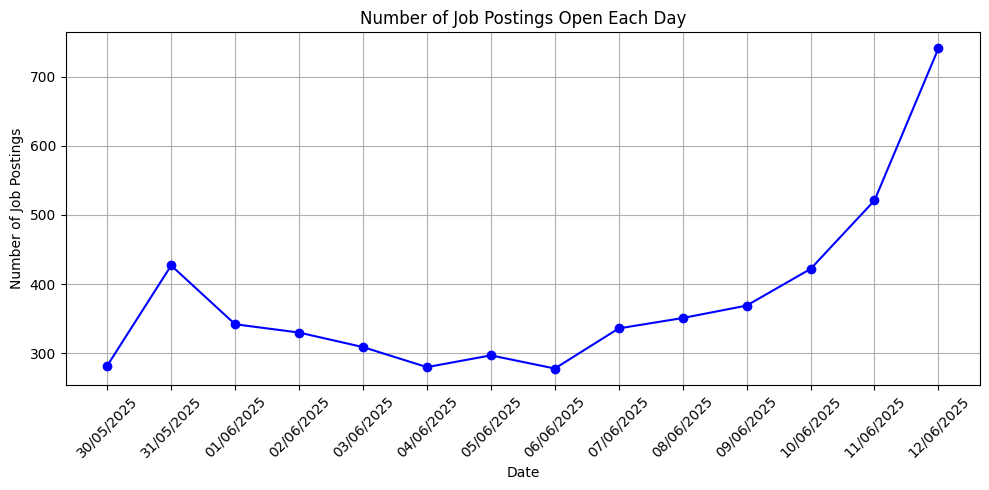

In [7]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from collections import Counter
from utils import parse_date

# Flatten occurrence dates
all_dates = []
for occ_list in df['occurrences'].dropna():
    if isinstance(occ_list, list):
        all_dates.extend(occ_list)
    elif isinstance(occ_list, str):
        all_dates.append(occ_list)

# Parse dates
date_objects = [parse_date(d) for d in all_dates]

# Count occurrences per date
date_counts = Counter(date_objects)

# Sort dates
sorted_dates = sorted(date_counts.items())
dates, counts = zip(*sorted_dates)

plt.figure(figsize=(10, 5))
plt.plot(dates, counts, marker='o', linestyle='-', color='b')

plt.title("Number of Job Postings Open Each Day")
plt.xlabel("Date")
plt.ylabel("Number of Job Postings")
plt.grid(True)

# Set major locator and formatter for dates
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator())  # Tick every day
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))  # Format as DD/MM/YYYY

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



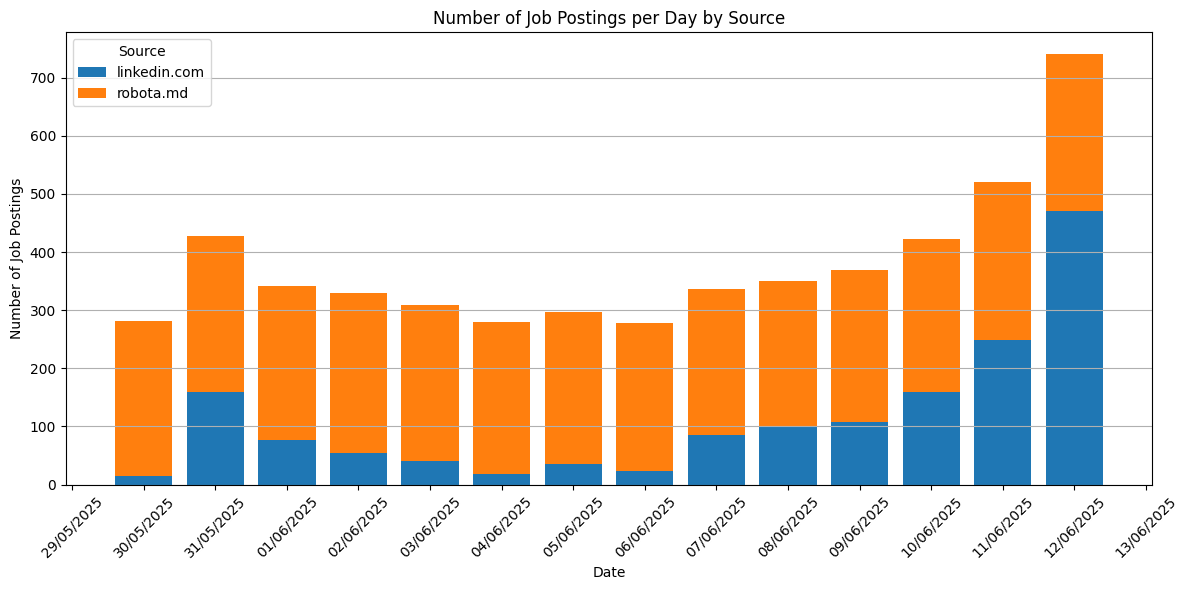

In [8]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from collections import defaultdict
from utils import parse_date
import pandas as pd

# Prepare nested dictionary: {date: {source: count}}
date_source_counts = defaultdict(lambda: defaultdict(int))

for idx, row in df.dropna(subset=['occurrences', 'source']).iterrows():
    source = row['source']
    occ_list = row['occurrences']
    
    if not isinstance(occ_list, list):
        occ_list = [occ_list]
    
    for d in occ_list:
        date_obj = parse_date(d)
        date_source_counts[date_obj][source] += 1

# Get sorted unique dates
all_dates = sorted(date_source_counts.keys())

# Get list of all sources
all_sources = sorted({source for counts in date_source_counts.values() for source in counts})

# Prepare data for stacked bar chart
counts_per_source = {source: [] for source in all_sources}

for date in all_dates:
    counts_for_date = date_source_counts[date]
    for source in all_sources:
        counts_per_source[source].append(counts_for_date.get(source, 0))

# Plot stacked bars
plt.figure(figsize=(12, 6))
bottom = [0] * len(all_dates)

for source in all_sources:
    plt.bar(all_dates, counts_per_source[source], bottom=bottom, label=source)
    bottom = [sum(x) for x in zip(bottom, counts_per_source[source])]

plt.title("Number of Job Postings per Day by Source")
plt.xlabel("Date")
plt.ylabel("Number of Job Postings")
plt.grid(axis='y')

# Format x-axis dates
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))

plt.xticks(rotation=45)
plt.legend(title="Source")
plt.tight_layout()
plt.show()


## Jobs alive

X-axis spans 14 days from 2025-05-30 00:00:00 to 2025-06-12 00:00:00
DEBUG: Examining first 10 jobs:
Job 1:
  Occurrences: ['30/05/2025', '02/06/2025', '03/06/2025', '10/06/2025', '09/06/2025', '05/06/2025', '04/06/2025', '06/06/2025', '31/05/2025', '07/06/2025']
  Start date (min occurrence): 2025-05-30 00:00:00
  End date (max occurrence): 2025-06-10 00:00:00
  Duration: 11 days
  Same day? False

Multi-day job example: starts 2025-05-30, ends 2025-06-10, duration: 11 days
Job 2:
  Occurrences: ['02/06/2025', '01/06/2025', '31/05/2025', '30/05/2025']
  Start date (min occurrence): 2025-05-30 00:00:00
  End date (max occurrence): 2025-06-02 00:00:00
  Duration: 3 days
  Same day? False

Multi-day job example: starts 2025-05-30, ends 2025-06-02, duration: 3 days
Job 3:
  Occurrences: ['30/05/2025', '11/06/2025', '02/06/2025', '03/06/2025', '08/06/2025', '10/06/2025', '05/06/2025', '09/06/2025', '04/06/2025', '12/06/2025', '06/06/2025', '01/06/2025', '31/05/2025', '07/06/2025']
  Start 

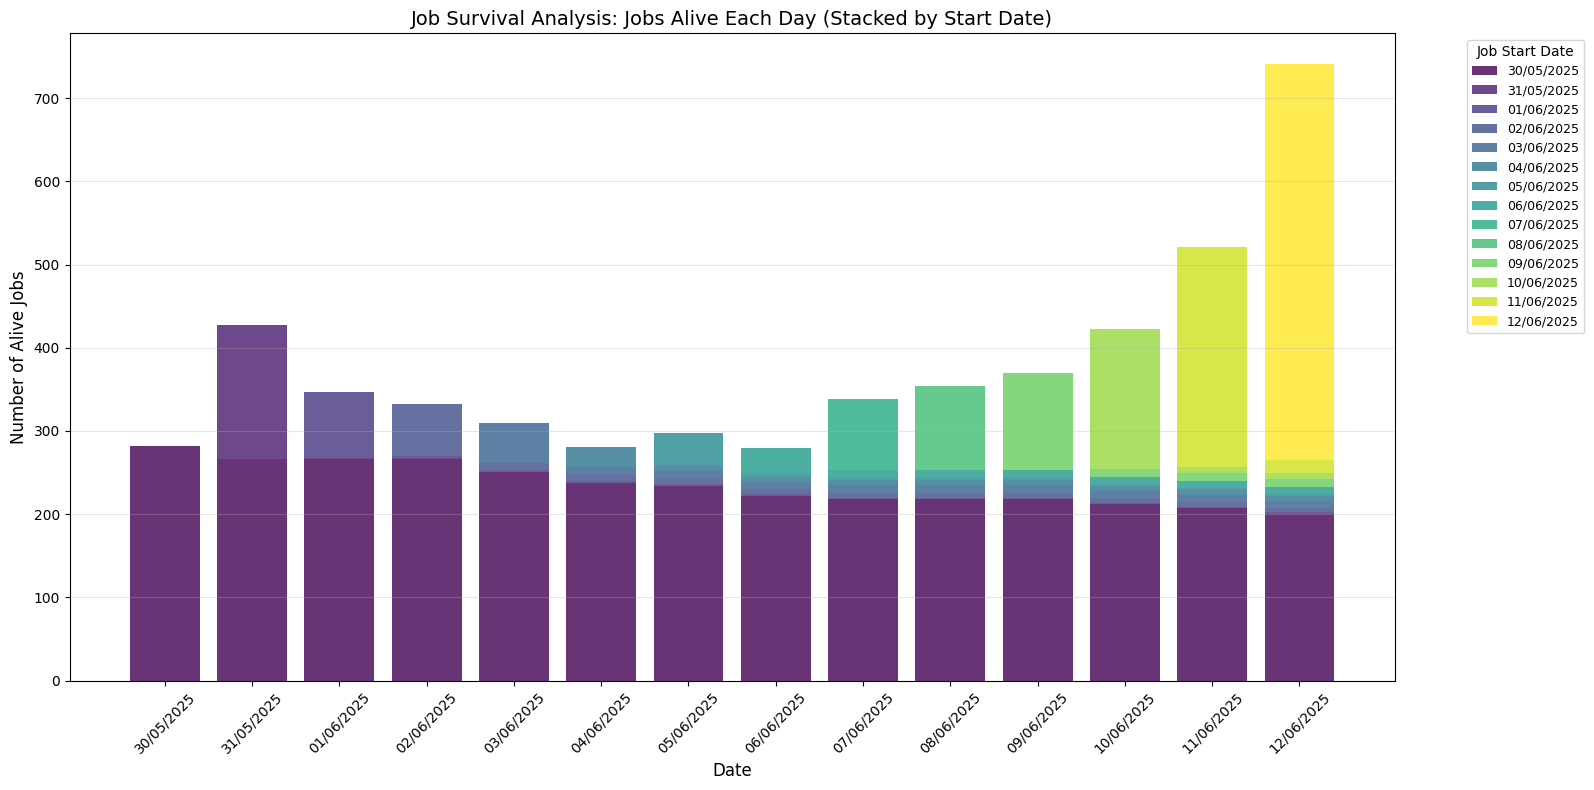


Summary:
Peak alive jobs: 741 on 12/06/2025
Average jobs alive per day: 378.9

Evolution of jobs from first 3 start dates:
  30/05/2025: Peak 282 jobs, lasted 14 days
  31/05/2025: Peak 162 jobs, lasted 3 days
  01/06/2025: Peak 79 jobs, lasted 12 days


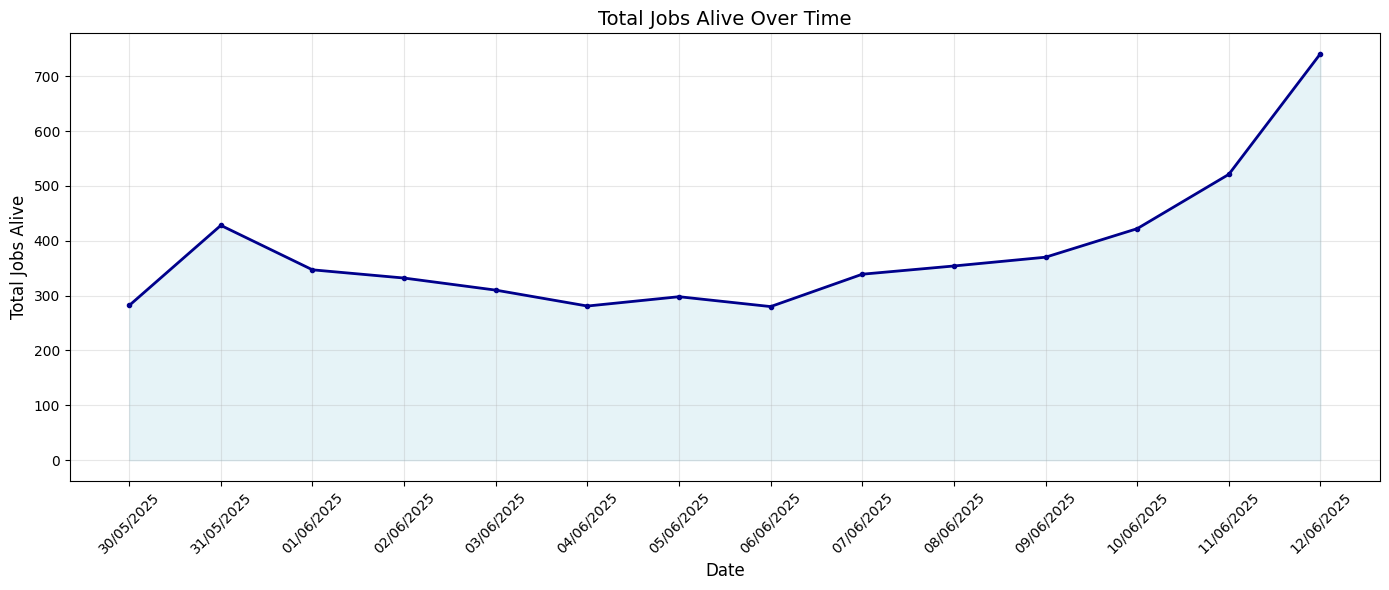

In [9]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
from collections import defaultdict
from utils import parse_date

# Get all unique dates for x-axis (from both date column and occurrences)
all_dates = set()

# Add dates from date column
for d in df['date'].dropna():
    all_dates.add(parse_date(d))

# Add dates from occurrences
for idx, row in df.iterrows():
    occ_value = row['occurrences']
    try:
        # Skip if None or empty
        if occ_value is None:
            continue
        
        # Handle different data types
        if isinstance(occ_value, (list, np.ndarray)):
            occ_list = occ_value
        else:
            # Single value or string
            occ_list = [occ_value]
        
        for occ_date in occ_list:
            try:
                if occ_date is not None and str(occ_date).strip() != '' and str(occ_date).lower() != 'nan':
                    all_dates.add(parse_date(occ_date))
            except:
                continue  # Skip invalid dates
    except:
        continue  # Skip problematic rows

# Sort all dates for x-axis
x_axis_dates = sorted(all_dates)
print(f"X-axis spans {len(x_axis_dates)} days from {x_axis_dates[0]} to {x_axis_dates[-1]}")

# For each x-axis date, count how many jobs from each start date are still alive
survival_data = {}  # {start_date: [count_day1, count_day2, ...]}

# Process each job
job_count = 0
multi_day_jobs = 0

print("DEBUG: Examining first 10 jobs:")
debug_count = 0

for idx, row in df.dropna(subset=['occurrences']).iterrows():
    occ_list = row['occurrences']
    if not isinstance(occ_list, list):
        occ_list = [occ_list]
    
    # Parse all occurrence dates
    parsed_occurrences = []
    for occ_date in occ_list:
        try:
            if occ_date is not None and str(occ_date).strip() != '' and str(occ_date).lower() != 'nan':
                parsed_occurrences.append(parse_date(occ_date))
        except:
            continue
    
    if not parsed_occurrences:
        continue
        
    # Find start and end dates from occurrences
    start_date = min(parsed_occurrences)
    end_date = max(parsed_occurrences)
    
    job_count += 1
    
    # Initialize survival data for this start date if needed
    if start_date not in survival_data:
        survival_data[start_date] = [0] * len(x_axis_dates)
    
    # Debug first 10 jobs
    if debug_count < 10:
        print(f"Job {debug_count + 1}:")
        print(f"  Occurrences: {occ_list}")
        print(f"  Start date (min occurrence): {start_date}")
        print(f"  End date (max occurrence): {end_date}") 
        print(f"  Duration: {(end_date - start_date).days} days")
        print(f"  Same day? {start_date.date() == end_date.date()}")
        print()
        debug_count += 1
    
    # Check if job lives more than one day
    if (end_date - start_date).days > 0:
        multi_day_jobs += 1
        if multi_day_jobs <= 5:  # Show first 5 examples
            print(f"Multi-day job example: starts {start_date.strftime('%Y-%m-%d')}, ends {end_date.strftime('%Y-%m-%d')}, duration: {(end_date - start_date).days} days")
    
    # OPTION 1: Mark job as alive from start to end date (continuous survival)
    for day_idx, current_day in enumerate(x_axis_dates):
        if start_date <= current_day <= end_date:
            survival_data[start_date][day_idx] += 1
    
    # OPTION 2: Only mark job as alive on days it was actually observed
    # Uncomment these lines and comment out the above loop to use this approach:
    # for occurrence_date in parsed_occurrences:
    #     if occurrence_date in x_axis_dates:
    #         day_idx = x_axis_dates.index(occurrence_date)
    #         survival_data[start_date][day_idx] += 1

print(f"Total jobs processed: {job_count}")
print(f"Jobs lasting more than 1 day: {multi_day_jobs}")
print(f"Percentage of multi-day jobs: {multi_day_jobs/job_count*100:.1f}%")

# Sort start dates (oldest first for bottom stacking)
start_dates_sorted = sorted(survival_data.keys())

print(f"Found {len(start_dates_sorted)} different start dates")
print(f"Total jobs analyzed: {job_count}")

# DEBUG: Show the survival matrix
print(f"\nSurvival Matrix (rows=start_dates, cols=timeline_days):")
print("Start Date    ->", " | ".join([d.strftime('%m/%d') for d in x_axis_dates]))
for start_date in start_dates_sorted:
    counts = survival_data[start_date]
    print(f"{start_date.strftime('%m/%d')} -> {counts}")

# Check if we have any cross-day survival
total_per_day = [sum(survival_data[start_date][day_idx] for start_date in start_dates_sorted) 
                 for day_idx in range(len(x_axis_dates))]
print(f"\nTotal jobs per day: {total_per_day}")

# Check how many start dates contribute to each day
for day_idx, day in enumerate(x_axis_dates):
    contributing_starts = [start_date for start_date in start_dates_sorted 
                          if survival_data[start_date][day_idx] > 0]
    if len(contributing_starts) > 1:
        print(f"Day {day.strftime('%m/%d')} has jobs from {len(contributing_starts)} different start dates: {[d.strftime('%m/%d') for d in contributing_starts]}")

# Create the stacked bar chart
plt.figure(figsize=(16, 8))

# Use a more professional color palette
colors = plt.cm.viridis(np.linspace(0, 1, len(start_dates_sorted)))

x = np.arange(len(x_axis_dates))
bottom = np.zeros(len(x_axis_dates))

# Stack from oldest (bottom) to newest (top)
for i, start_date in enumerate(start_dates_sorted):
    counts = survival_data[start_date]
    
    # Only plot if there are any jobs from this start date
    if max(counts) > 0:
        plt.bar(x, counts, bottom=bottom, color=colors[i], width=0.8,
                label=start_date.strftime('%d/%m/%Y'), alpha=0.8)
        bottom += counts

plt.title("Job Survival Analysis: Jobs Alive Each Day (Stacked by Start Date)", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Number of Alive Jobs", fontsize=12)
plt.grid(axis='y', alpha=0.3)

# Format x-axis
ax = plt.gca()
step = max(1, len(x)//15)  # Show ~15 labels
ax.set_xticks(x[::step])
ax.set_xticklabels([d.strftime('%d/%m/%Y') for d in x_axis_dates[::step]], rotation=45)

# Legend (limit if too many start dates)
if len(start_dates_sorted) <= 15:
    plt.legend(title="Job Start Date", bbox_to_anchor=(1.05, 1), loc='upper left',
              fontsize=9, title_fontsize=10)
else:
    # Just show text about number of cohorts if too many
    plt.text(1.02, 0.5, f"{len(start_dates_sorted)} different\nstart dates\n(oldest at bottom)", 
             transform=ax.transAxes, fontsize=10, verticalalignment='center')

plt.tight_layout()
plt.show()

# Print some statistics
peak_day_idx = np.argmax(total_per_day)
peak_count = total_per_day[peak_day_idx]
peak_date = x_axis_dates[peak_day_idx]

print(f"\nSummary:")
print(f"Peak alive jobs: {peak_count} on {peak_date.strftime('%d/%m/%Y')}")
print(f"Average jobs alive per day: {np.mean(total_per_day):.1f}")

# Show how jobs from first few start dates evolve
print(f"\nEvolution of jobs from first 3 start dates:")
for i, start_date in enumerate(start_dates_sorted[:3]):
    counts = survival_data[start_date]
    max_count = max(counts)
    days_alive = len([c for c in counts if c > 0])
    print(f"  {start_date.strftime('%d/%m/%Y')}: Peak {max_count} jobs, lasted {days_alive} days")

# Simple line plot showing total alive jobs
plt.figure(figsize=(14, 6))
plt.plot(x, total_per_day, marker='o', linewidth=2, markersize=3, color='darkblue')
plt.fill_between(x, total_per_day, alpha=0.3, color='lightblue')
plt.title("Total Jobs Alive Over Time", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Total Jobs Alive", fontsize=12)
plt.grid(True, alpha=0.3)

ax = plt.gca()
ax.set_xticks(x[::step])
ax.set_xticklabels([d.strftime('%d/%m/%Y') for d in x_axis_dates[::step]], rotation=45)

plt.tight_layout()
plt.show()

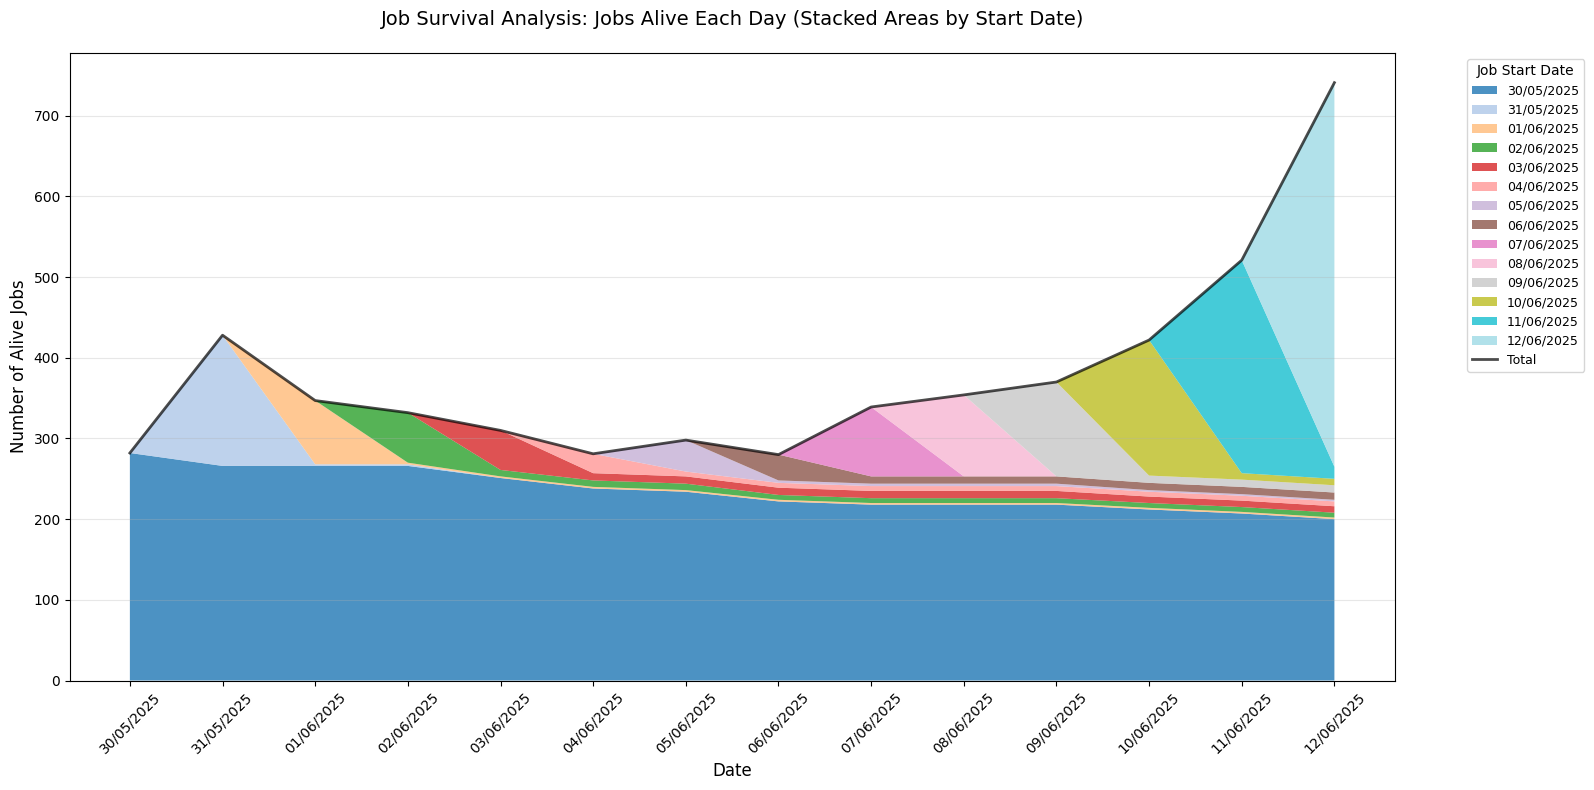

In [10]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
from collections import defaultdict
from utils import parse_date

# Get all unique dates for x-axis (from both date column and occurrences)
all_dates = set()

# Add dates from date column
for d in df['date'].dropna():
    all_dates.add(parse_date(d))

# Add dates from occurrences
for idx, row in df.iterrows():
    occ_value = row['occurrences']
    try:
        # Skip if None or empty
        if occ_value is None:
            continue
        
        # Handle different data types
        if isinstance(occ_value, (list, np.ndarray)):
            occ_list = occ_value
        else:
            # Single value or string
            occ_list = [occ_value]
        
        for occ_date in occ_list:
            try:
                if occ_date is not None and str(occ_date).strip() != '' and str(occ_date).lower() != 'nan':
                    all_dates.add(parse_date(occ_date))
            except:
                continue  # Skip invalid dates
    except:
        continue  # Skip problematic rows

# Sort all dates for x-axis
x_axis_dates = sorted(all_dates)

# For each x-axis date, count how many jobs from each start date are still alive
survival_data = {}  # {start_date: [count_day1, count_day2, ...]}

# Process each job
for idx, row in df.dropna(subset=['occurrences']).iterrows():
    occ_list = row['occurrences']
    if not isinstance(occ_list, list):
        occ_list = [occ_list]
    
    # Parse all occurrence dates
    parsed_occurrences = []
    for occ_date in occ_list:
        try:
            if occ_date is not None and str(occ_date).strip() != '' and str(occ_date).lower() != 'nan':
                parsed_occurrences.append(parse_date(occ_date))
        except:
            continue
    
    if not parsed_occurrences:
        continue
        
    # Find start and end dates from occurrences
    start_date = min(parsed_occurrences)
    end_date = max(parsed_occurrences)
    
    # Initialize survival data for this start date if needed
    if start_date not in survival_data:
        survival_data[start_date] = [0] * len(x_axis_dates)
    
    # Mark job as alive from start to end date (continuous survival)
    for day_idx, current_day in enumerate(x_axis_dates):
        if start_date <= current_day <= end_date:
            survival_data[start_date][day_idx] += 1

# Sort start dates (oldest first for bottom stacking)
start_dates_sorted = sorted(survival_data.keys())

# Limit the number of visible cohorts for better visualization
MAX_COHORTS = 15  # Show only top cohorts by volume
if len(start_dates_sorted) > MAX_COHORTS:
    # Calculate total jobs for each start date and keep top ones
    cohort_totals = {}
    for start_date in start_dates_sorted:
        cohort_totals[start_date] = sum(survival_data[start_date])
    
    # Sort by total volume and keep top cohorts
    top_cohorts = sorted(cohort_totals.items(), key=lambda x: x[1], reverse=True)[:MAX_COHORTS]
    visible_start_dates = [item[0] for item in top_cohorts]
    visible_start_dates.sort()  # Sort chronologically for stacking
    
    # Aggregate remaining cohorts into "Others"
    others_data = [0] * len(x_axis_dates)
    for start_date in start_dates_sorted:
        if start_date not in visible_start_dates:
            for day_idx in range(len(x_axis_dates)):
                others_data[day_idx] += survival_data[start_date][day_idx]
else:
    visible_start_dates = start_dates_sorted
    others_data = None

# Create the stacked area chart
plt.figure(figsize=(16, 8))

# Use a more distinct color palette
colors = plt.cm.tab20(np.linspace(0, 1, len(visible_start_dates) + (1 if others_data else 0)))

x = np.arange(len(x_axis_dates))

# Prepare data for stackplot
stack_data = []
labels = []

for start_date in visible_start_dates:
    stack_data.append(survival_data[start_date])
    labels.append(start_date.strftime('%d/%m/%Y'))

if others_data and max(others_data) > 0:
    stack_data.append(others_data)
    labels.append(f'Others ({len(start_dates_sorted) - len(visible_start_dates)} cohorts)')

# Create stacked area plot
plt.stackplot(x, *stack_data, labels=labels, colors=colors, alpha=0.8)

# Add a line for total jobs
total_per_day = [sum(survival_data[start_date][day_idx] for start_date in start_dates_sorted) 
                 for day_idx in range(len(x_axis_dates))]
plt.plot(x, total_per_day, color='black', linewidth=2, alpha=0.7, label='Total')

plt.title("Job Survival Analysis: Jobs Alive Each Day (Stacked Areas by Start Date)", fontsize=14, pad=20)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Number of Alive Jobs", fontsize=12)
plt.grid(axis='y', alpha=0.3)

# Format x-axis
ax = plt.gca()
step = max(1, len(x)//15)  # Show ~15 labels
ax.set_xticks(x[::step])
ax.set_xticklabels([d.strftime('%d/%m/%Y') for d in x_axis_dates[::step]], rotation=45)

# Legend
plt.legend(title="Job Start Date", bbox_to_anchor=(1.05, 1), loc='upper left',
          fontsize=9, title_fontsize=10)

plt.tight_layout()
plt.show()

# Most common keywords in job titles

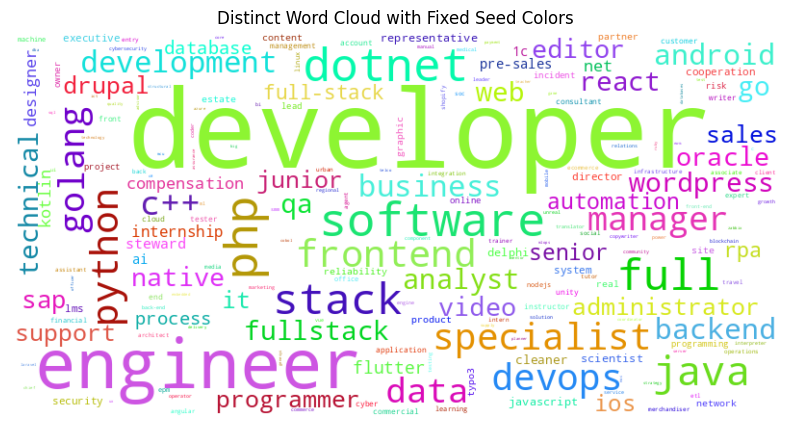

In [11]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import random

# 1. Get word frequencies
all_words = [word for title in df['title'].dropna() for word in title.split()]
word_counts = Counter(all_words)
words = list(word_counts.keys())

# 2. Generate n distinct HSL colors using evenly spaced hues
def generate_distinct_colors(n, seed=42):
    random.seed(seed)
    hues = list(range(0, 360, 360 // n))
    random.shuffle(hues)
    return [
        f"hsl({h}, {random.randint(70, 100)}%, {random.randint(35, 65)}%)"
        for h in hues
    ]

# 3. Build color map: word → color
colors = generate_distinct_colors(len(words), seed=9534632359)
word_color_map = dict(zip(words, colors))

# 4. Custom color function using precomputed map
def fixed_color_func(word, *args, **kwargs):
    return word_color_map.get(word, "black")

# 5. Generate word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    collocations=False,
    color_func=fixed_color_func
).generate_from_frequencies(word_counts)

# 6. Plot
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Distinct Word Cloud with Fixed Seed Colors')
plt.show()

## Most common keywords in processed data of rabota.md and linkedin.com

Analyzing columns: ['title', 'min_salary', 'max_salary', 'minimum_education', 'languages', 'experience', 'responsibilities', 'hard_skills', 'soft_skills', 'certifications', 'benefits', 'company_name', 'company_size', 'employment_type', 'work_schedule', 'contract_type', 'remote_work', 'job_categories', 'original_url']
Total records: 1941
Extracting words from processed data...
Processing column: title
Processing column: min_salary
Processing column: max_salary
Processing column: minimum_education
Processing column: languages
Processing column: experience
Processing column: responsibilities
Processing column: hard_skills
Processing column: soft_skills
Processing column: certifications
Processing column: benefits
Processing column: company_name
Processing column: company_size
Processing column: employment_type
Processing column: work_schedule
Processing column: contract_type
Processing column: remote_work
Processing column: job_categories
Processing column: original_url
Total words extrac

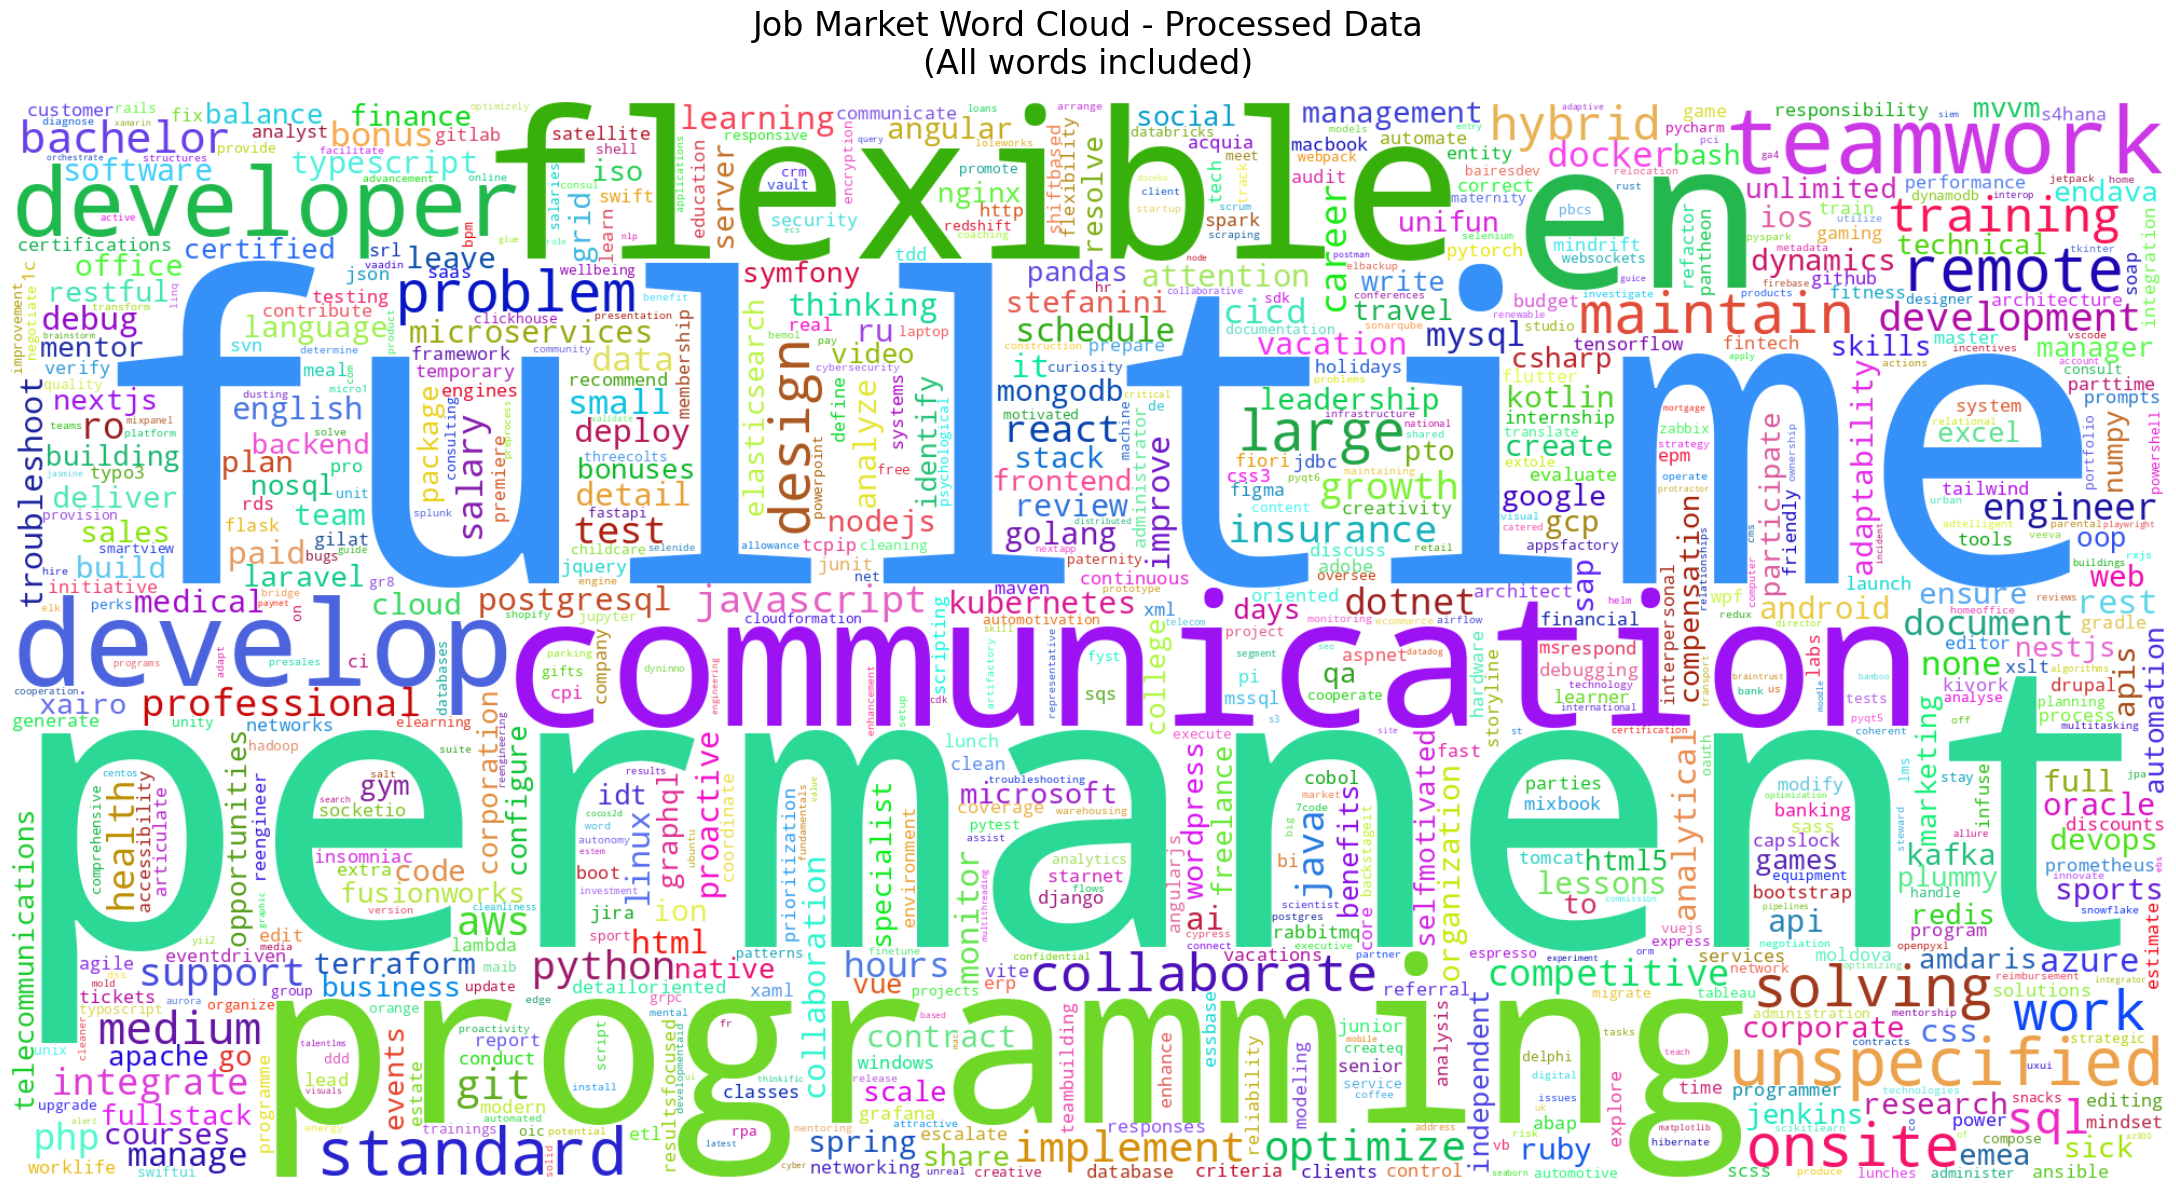


Word Cloud Statistics:
- Total records analyzed: 1941
- Columns analyzed: 19
- Words displayed: 3915
- Most common words: [('fulltime', 1826), ('permanent', 1655), ('programming', 1613), ('en', 1357), ('flexible', 1325), ('communication', 1255), ('develop', 1207), ('developer', 1188), ('teamwork', 1118), ('unspecified', 1107), ('standard', 1065), ('remote', 965), ('onsite', 913), ('problem', 851), ('solving', 851)]


In [12]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import random
import pandas as pd
import re

# Use the already loaded processed dataframe (df)
# Exclude 'date' and 'occurrences' columns from analysis
columns_to_exclude = ['date', 'occurrences', 'source', 'salary_min', 'salary_max', 'salary_currency', 'city', 'country', 'company_industry']
columns_to_analyze = [col for col in df.columns if col not in columns_to_exclude]

print(f"Analyzing columns: {columns_to_analyze}")
print(f"Total records: {len(df)}")

def clean_word(word):
    """Basic word cleaning - only remove punctuation"""
    # Remove punctuation and normalize
    word = re.sub(r'[^\w]', '', word).lower().strip()
    
    # Skip if too short or numeric
    if len(word) < 2 or word.isdigit():
        return None
    
    return word

def extract_words_from_processed_df(df, columns_to_analyze):
    """Extract words from all specified columns"""
    all_words = []
    
    for col in columns_to_analyze:
        if col in df.columns:
            print(f"Processing column: {col}")
            for val in df[col].dropna():
                if isinstance(val, list):
                    for item in val:
                        words = str(item).split()
                        for word in words:
                            cleaned = clean_word(word)
                            if cleaned:
                                all_words.append(cleaned)
                else:
                    words = str(val).split()
                    for word in words:
                        cleaned = clean_word(word)
                        if cleaned:
                            all_words.append(cleaned)
    
    return all_words

# Extract words from processed dataframe
print("Extracting words from processed data...")
all_words = extract_words_from_processed_df(df, columns_to_analyze)
print(f"Total words extracted: {len(all_words)}")

# Count word frequencies
word_counts = Counter(all_words)
print(f"Unique words: {len(word_counts)}")
print(f"Top 10 words: {word_counts.most_common(10)}")

words = list(word_counts.keys())

# Generate distinct HSL colors with better distribution
def generate_distinct_colors(n, seed=42):
    """Generate visually distinct colors using golden angle"""
    random.seed(seed)
    if n == 0:
        return []
    
    colors = []
    golden_angle = 137.508  # Golden angle in degrees
    
    for i in range(n):
        hue = (i * golden_angle) % 360
        saturation = random.randint(65, 95)  # High saturation
        lightness = random.randint(35, 65)   # Medium lightness
        colors.append(f"hsl({hue:.0f}, {saturation}%, {lightness}%)")
    
    return colors

# Create word-color map
colors = generate_distinct_colors(len(words), seed=9534632359)
word_color_map = dict(zip(words, colors))

def fixed_color_func(word, *args, **kwargs):
    return word_color_map.get(word, "black")

# Generate word cloud
wordcloud = WordCloud(
    max_words=1000,
    width=2000,
    height=1000,
    background_color='white',
    collocations=False,
    color_func=fixed_color_func,
    relative_scaling=0.5,
    min_font_size=8
).generate_from_frequencies(word_counts)

# Plot
plt.figure(figsize=(24, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Job Market Word Cloud - Processed Data\n(All words included)', 
          fontsize=24, pad=20)
plt.tight_layout()
plt.show()

# Print statistics
print(f"\nWord Cloud Statistics:")
print(f"- Total records analyzed: {len(df)}")
print(f"- Columns analyzed: {len(columns_to_analyze)}")
print(f"- Words displayed: {len(word_counts)}")
print(f"- Most common words: {word_counts.most_common(15)}")

## Most common keywords in raw data of rabota.md and linkedin.com

Extracting words from Robota...
Processing robota column: vacancy-title
Processing robota column: company-title
Processing robota column: sidebar
Processing robota column: vacancy-content
Robota words extracted: 39766
Extracting words from LinkedIn...
Processing linkedin column: job_title
Processing linkedin column: company_name
Processing linkedin column: job_description
Processing linkedin column: seniority_level
Processing linkedin column: employment_type
Processing linkedin column: industries
Processing linkedin column: skills
LinkedIn words extracted: 321135
Total unique words (min freq 2): 8660
Top 10 words: [('design', 2854), ('develop', 1725), ('busi', 1593), ('learn', 1539), ('services', 1498), ('technical', 1462), ('build', 1446), ('understand', 1431), ('solutions', 1418), ('code', 1391)]


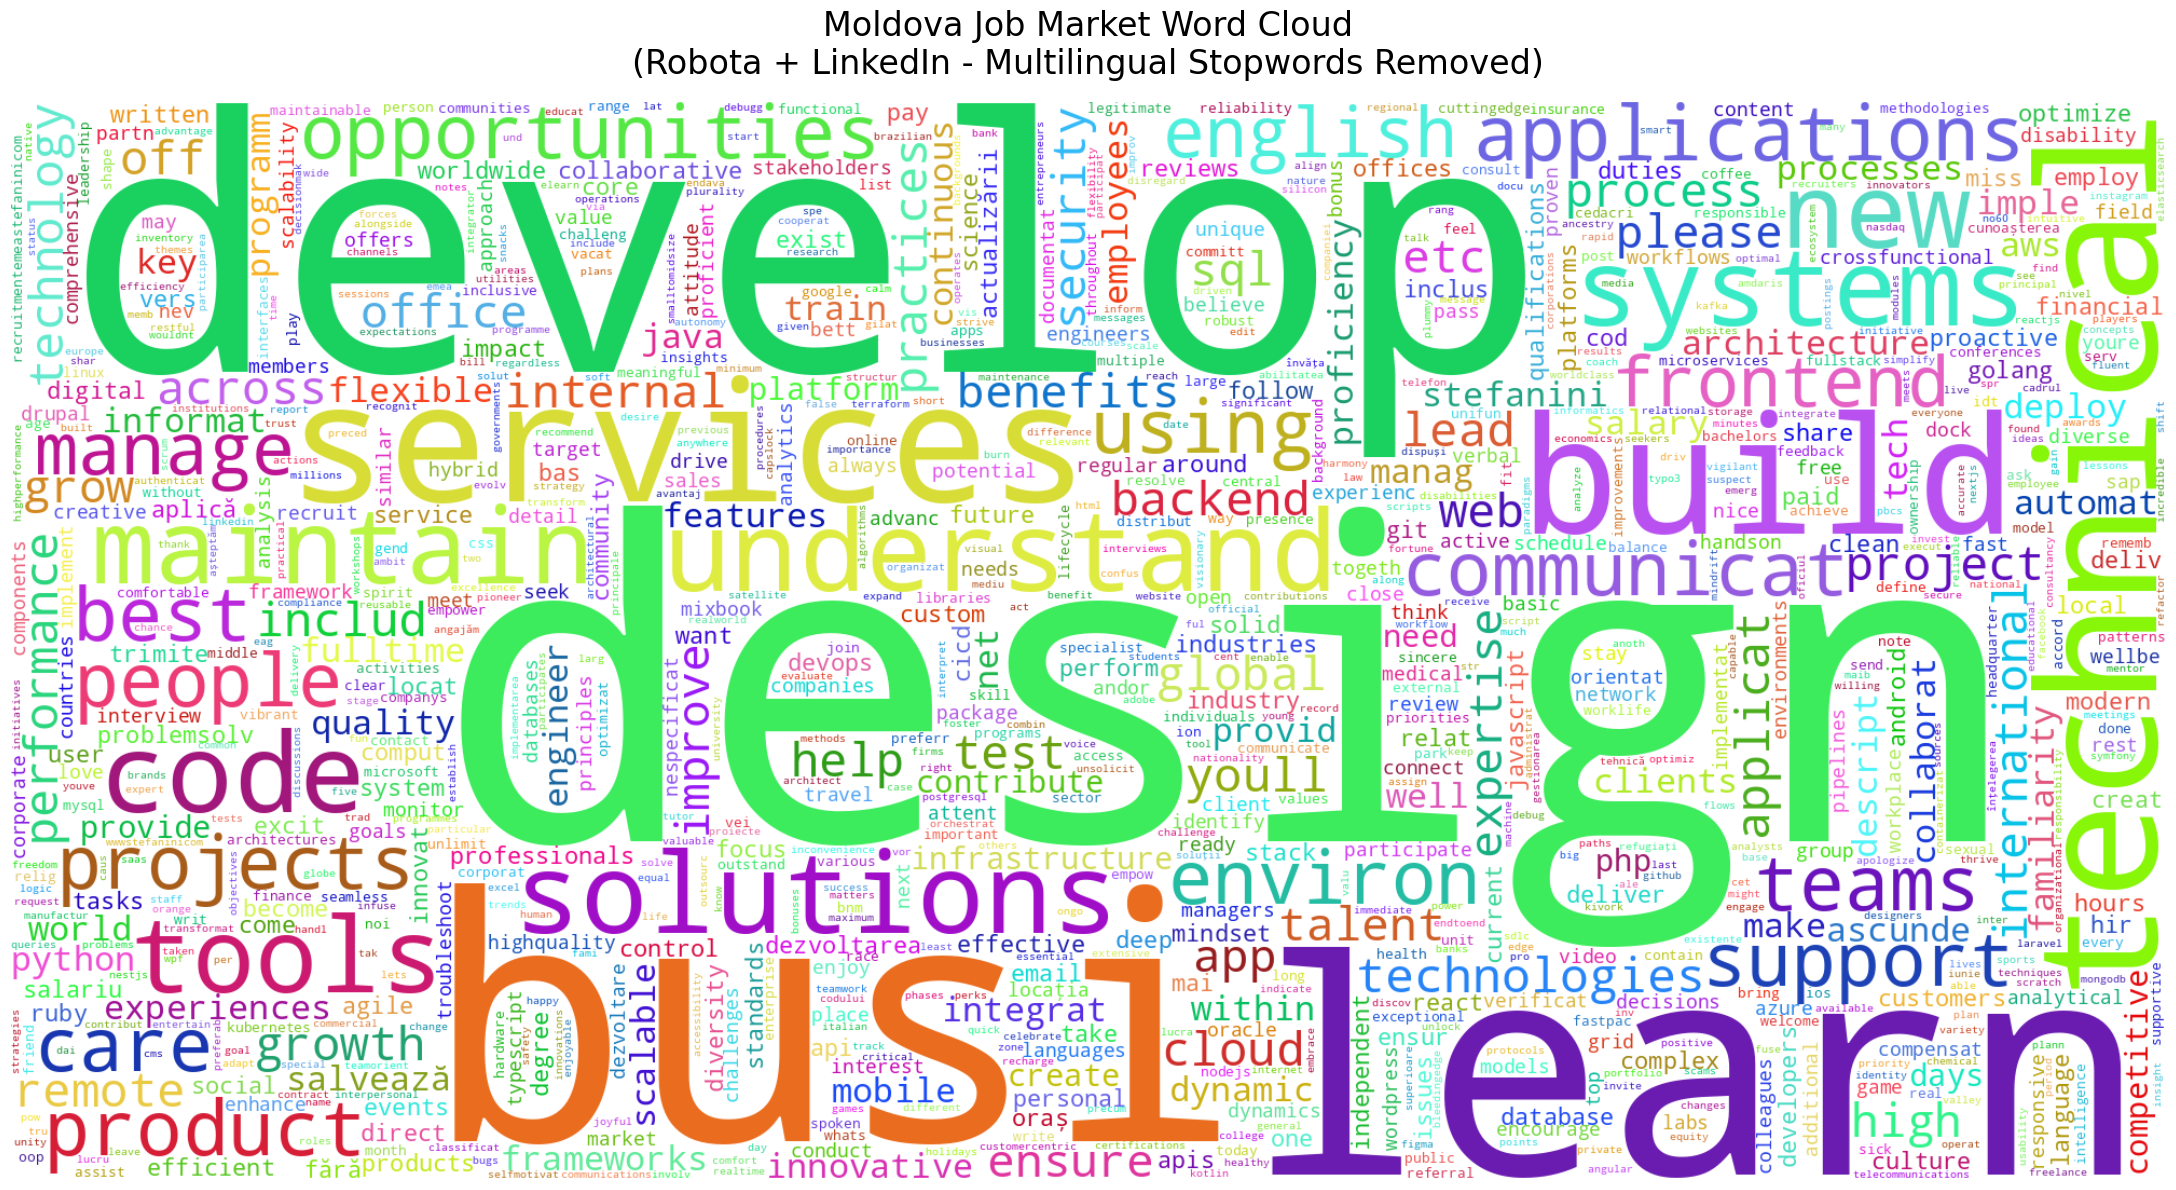


Word Cloud Statistics:
- Total jobs analyzed: 345 (Robota) + 1477 (LinkedIn)
- Words displayed: 8660
- Most common technical terms: ['design', 'develop', 'learn', 'services', 'technical', 'build', 'understand', 'solutions', 'systems', 'tools']


In [13]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import random
import pandas as pd
import re

# Load data from raw tables
robota_df = pd.DataFrame(db.table(TABLE_ROBOTA_MD_RAW).all())
linkedin_df = pd.DataFrame(db.table(TABLE_LINKEDIN_RAW).all())

# Define source-specific fields
robota_columns = ['vacancy-title', 'company-title', 'sidebar', 'vacancy-content']
linkedin_columns = ['job_title', 'company_name', 'job_description', 'seniority_level', 'employment_type', 'industries', 'skills']

# Comprehensive stopwords (English + Romanian + Russian + Job-specific)
stopwords = set(STOPWORDS)

# Romanian stopwords
romanian_stopwords = {
    'și', 'în', 'de', 'la', 'cu', 'pe', 'pentru', 'din', 'către', 'sau', 'dar', 'că', 'cel', 'cea', 'cei', 'cele',
    'un', 'una', 'unei', 'unui', 'acestui', 'acestei', 'această', 'acest', 'aceste', 'aceștia', 'acestea',
    'muncă', 'munca', 'locul', 'locului', 'angajatorului', 'angajator', 'nu', 'contează', 'data', 'datei',
    'experiența', 'experiență', 'ani', 'anul', 'program', 'programul', 'full', 'time', 'part', 'studii',
    'căutare', 'căutări', 'locuri', 'joburi', 'job', 'poziție', 'poziția', 'candidat', 'candidatul', 'candidați',
    'responsabilități', 'responsabilitate', 'cerințe', 'cerință', 'competențe', 'competența', 'abilități', 'abilitate',
    'cunoștințe', 'cunoaștere', 'echipa', 'echipă', 'companie', 'compania', 'firma', 'firmă', 'aplicant', 'aplicanți'
}

# Russian stopwords
russian_stopwords = {
    'и', 'в', 'на', 'с', 'по', 'для', 'от', 'за', 'к', 'до', 'из', 'у', 'о', 'об', 'не', 'что', 'как', 'это',
    'все', 'или', 'так', 'его', 'её', 'их', 'мы', 'вы', 'он', 'она', 'они', 'наш', 'ваш', 'их', 'этот', 'эта', 'эти',
    'работа', 'работы', 'работе', 'работу', 'место', 'места', 'опыт', 'опыта', 'год', 'года', 'лет', 'компания', 'компании',
    'кандидат', 'кандидата', 'требования', 'требование', 'обязанности', 'обязанность', 'навыки', 'навык', 'знание', 'знания',
    'умение', 'умения', 'специалист', 'специалиста', 'должность', 'позиция', 'вакансия', 'команда', 'команды'
}

# Job-specific English stopwords
job_stopwords = {
    'experience', 'work', 'working', 'years', 'year', 'requirements', 'required', 'must', 'should', 'will', 'would',
    'job', 'position', 'role', 'candidate', 'candidates', 'team', 'company', 'responsibilities', 'skills', 'skill',
    'knowledge', 'ability', 'strong', 'good', 'excellent', 'can', 'could', 'level', 'senior', 'junior', 'mid',
    'developer', 'engineer', 'software', 'development', 'plus', 'looking', 'seek', 'ideal', 'perfect', 'great',
    'opportunity', 'join', 'passionate', 'motivated', 'dedicated', 'professional', 'successful', 'collaborate'
}

# Location-specific stopwords
location_stopwords = {
    'chișinău', 'chisinau', 'moldova', 'moldovan', 'moldovei', 'republic', 'md', 'romania', 'bucuresti', 'bucharest'
}

# Combine all stopwords
stopwords |= romanian_stopwords | russian_stopwords | job_stopwords | location_stopwords

def clean_word(word):
    """Clean and normalize a single word"""
    # Remove punctuation and normalize
    word = re.sub(r'[^\w]', '', word).lower().strip()
    
    # Skip if too short, numeric, or stopword
    if len(word) < 3 or word.isdigit() or word in stopwords:
        return None
    
    # Remove common suffixes for better grouping
    suffixes = ['ing', 'ed', 'er', 'est', 'ly', 'ion', 'tion', 'sion', 'ness', 'ment']
    for suffix in suffixes:
        if word.endswith(suffix) and len(word) > len(suffix) + 2:
            word = word[:-len(suffix)]
            break
    
    return word

def extract_words_from_fields(df, source):
    """Extract and clean words from relevant fields"""
    all_words = []
    
    if source == 'robota':
        fields = robota_columns
    elif source == 'linkedin':
        fields = linkedin_columns
    else:
        return all_words
    
    for col in fields:
        if col in df.columns:
            print(f"Processing {source} column: {col}")
            for val in df[col].dropna():
                if isinstance(val, list):
                    for item in val:
                        words = str(item).split()
                        for word in words:
                            cleaned = clean_word(word)
                            if cleaned:
                                all_words.append(cleaned)
                else:
                    words = str(val).split()
                    for word in words:
                        cleaned = clean_word(word)
                        if cleaned:
                            all_words.append(cleaned)
    
    return all_words

# Extract words from both sources
print("Extracting words from Robota...")
robota_words = extract_words_from_fields(robota_df, 'robota')
print(f"Robota words extracted: {len(robota_words)}")

print("Extracting words from LinkedIn...")
linkedin_words = extract_words_from_fields(linkedin_df, 'linkedin')
print(f"LinkedIn words extracted: {len(linkedin_words)}")

# Combine and count
all_words = robota_words + linkedin_words
word_counts = Counter(all_words)

# Filter out very rare words (appear only once) to reduce noise
min_frequency = 2
word_counts = {word: count for word, count in word_counts.items() if count >= min_frequency}

print(f"Total unique words (min freq {min_frequency}): {len(word_counts)}")
print(f"Top 10 words: {Counter(word_counts).most_common(10)}")

words = list(word_counts.keys())

# Generate distinct HSL colors with better distribution
def generate_distinct_colors(n, seed=42):
    """Generate visually distinct colors using golden angle"""
    random.seed(seed)
    if n == 0:
        return []
    
    colors = []
    golden_angle = 137.508  # Golden angle in degrees
    
    for i in range(n):
        hue = (i * golden_angle) % 360
        saturation = random.randint(65, 95)  # High saturation
        lightness = random.randint(35, 65)   # Medium lightness
        colors.append(f"hsl({hue:.0f}, {saturation}%, {lightness}%)")
    
    return colors

# Create word-color map
colors = generate_distinct_colors(len(words), seed=9534632359)
word_color_map = dict(zip(words, colors))

def fixed_color_func(word, *args, **kwargs):
    return word_color_map.get(word, "black")

# Generate word cloud
wordcloud = WordCloud(
    max_words=1000,  # Reduced for better readability
    width=2000,     # Slightly larger
    height=1000,
    background_color='white',
    collocations=False,
    color_func=fixed_color_func,
    relative_scaling=0.5,
    min_font_size=8
).generate_from_frequencies(word_counts)

# Plot with better formatting
plt.figure(figsize=(24, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Moldova Job Market Word Cloud\n(Robota + LinkedIn - Multilingual Stopwords Removed)', 
          fontsize=24, pad=20)
plt.tight_layout()
plt.show()

# Optional: Print statistics
print(f"\nWord Cloud Statistics:")
print(f"- Total jobs analyzed: {len(robota_df)} (Robota) + {len(linkedin_df)} (LinkedIn)")
print(f"- Words displayed: {len(word_counts)}")
print(f"- Most common technical terms: {[word for word, count in Counter(word_counts).most_common(20) if len(word) > 4][:10]}")

In [14]:
# Raw, non processed titles
# Get the value counts of the 'title' column
title_counts = df['title'].value_counts()

# Set pandas display options to show all rows
pd.set_option('display.max_rows', None)
pd.set_option('display.max_seq_items', None)

# Display all job title occurrences
print("All Job Title Occurrences:")
print(title_counts)

All Job Title Occurrences:
title
php developer                          107
dotnet developer                        92
java developer                          87
full stack developer                    73
python developer                        68
devops engineer                         61
c++ developer                           59
golang developer                        56
frontend developer                      44
android developer                       44
software developer                      41
backend developer                       36
go developer                            35
wordpress developer                     34
web developer                           33
software engineer                       32
react native developer                  32
fullstack developer                     31
data engineer                           31
junior developer                        25
ios developer                           24
drupal developer                        24
sap developer        

# Chrrypick job positionswith regex

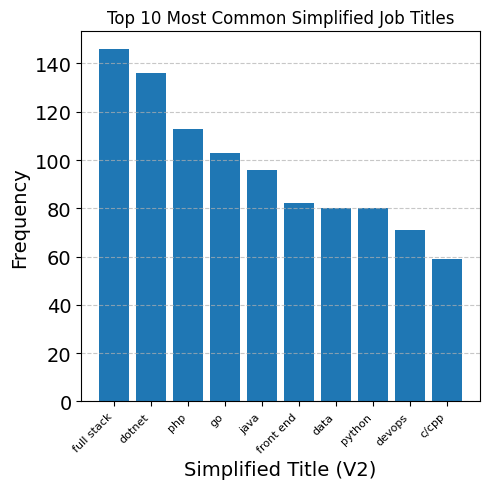


All Simplified Job Title Occurrences (Programming Languages Top, iOS/Android Higher, Full Stack Lower):
simplified_title_reordered_v2
full stack              146
dotnet                  136
php                     113
go                      103
java                     96
front end                82
data                     80
python                   80
devops                   71
c/cpp                    59
javascript               46
android                  44
back end                 42
quality assurance        40
wordpress                34
sql                      33
ios                      24
flutter                  15
graphic designer         14
kotlin                   14
site reliability          7
security analyst          7
project manager           6
system                    6
administrator             5
business analyst          3
architect                 2
embedded                  2
system administrator      2
unreal                    2
team lead                

In [15]:
# Cherry Pick with regex best words

# 1. Define dictionary with keyword / simplified titles you experienceect (priority matters implicitly by order)
JOB_KEYWORD_MAPPING_REORDERED_V2 = {
    # Programming Languages (Prioritized and ordered by perceived commonality/specificity)
    'python': r'python',
    'kotlin': r'kotlin',
    'java': r'java|full stack java|spring',
    'dotnet': r'\.net|dot[-\s]?net|net|asp\.net|aspdotdotnet|dotnetwork|dotdotnet|csharp/dotdotnet|aspdotdotnet dotdotnet|dotdotnet core|dotdotnet developers|c#|c[-\s]?sharp|csharp|asp\.net|dotdotnet',
    'javascript': r'node\.?js|nodejavascript|reactjs|react|react native|angularjs|angular|vue.javascript|vue.js', # Combining related JS frameworks
    'php': r'php symfony|php',
    'go': r'golang|go',
    'rust': r'rust',
    'swift': r'swift',
    'haskel': r'haskel|lisp',
    'ruby': r'ruby|rails', # Assuming Rails is specific to Ruby
    'c/cpp': r'c\+\+|c/cpp',
    'sql': r'sql|oracle|microsoft dynamics', # Databases related to programming

    # Mobile Development
    'ios': r'ios',
    'android': r'android',
    'flutter': r'flutter/dart|flutter',

    # Front-End and Back-End (Full Stack below)
    'front end': r'front[-\s]?end',
    'back end': r'back[-\s]?end|dotdotnet back end|back end nodejavascript',
    'full stack': r'full[-\s]?stack|full stack web|full stack web development|full stack development|arhitect full stack|dezvoltator full stack|full stack php|full stack dotdotnet',

    # Quality Assurance
    'quality assurance': r'qa|quality assurance|quality assurance analyst|automation quality assurance|quality assurance tester|tester',

    # Data Related
    'data': r'data analyst|data|data analyst data scientist|etl data tester|data steward',

    # DevOps and System Administration
    'devops': r'devops|azure devops|system devops',
    'system administrator': r'system administrator|linux dotnetwork administrator|system administrator helpdesk|web administrator',
    'linux administrator': r'linux',
    'monitoring operator': r'monitoring operator',
    'infrastructure support': r'infrastructure support',
    'system': r'system|linux dotnetwork system administrator',

    # Management/Leadership
    'project manager': r'project manager|software project manager',
    'product manager': r'product manager',
    'technology officer': r'technology officer',
    'delivery manager': r'delivery manager',
    'team lead': r'team lead', # Assuming this was a desired category (not in original, but often relevant)
    'architect': r'architect',

    # Analysis and Design
    'business analyst': r'business analyst|business analyst project coordinator',
    'ui ux designer': r'ui[/]?ux',
    'erp analyst': r'erp analyst',
    'market research analyst': r'market research analyst',
    'graphic designer': r'grafic designer|graphic designer|designer',
    'artist': r'artist',

    # Other Technical Roles
    'embedded': r'embedded|mcu',
    'unreal': r'unreal engine|unreal game |unrealdeveloper',
    'security analyst': r'security analyst',
    'cybersecurity': r'cybersecurity',
    'site reliability': r'site reliability',
    'mobile application': r'mobile application', # Keeping it here as it's a type of application
    'web': r'веб|веб-программист|web designer', # Broader web category
    'r&d': r'r&d',
    'wordpress': r'wordpress', # Could be web development, but often distinct
    'administrator': r'administrator', # Very general
        
    'UNKNOWN': 'other', # Default category if no keyword is found
}

def categorize_title_reordered_v2(title):
    """
    Passes through the job title and categorizes it based on the reordered
    predefined keywords with programming languages on top, full stack below
    front/back end, and iOS/Android higher.
    """
    if isinstance(title, str):
        processed_title = title.lower().strip()
        processed_title = re.sub(r'\([^)]*\)', '', processed_title).strip() # Remove parentheses content

        for category, pattern in JOB_KEYWORD_MAPPING_REORDERED_V2.items():
            if re.search(pattern, processed_title):
                return category
        return 'other'
    return 'other'

# Recalculate categorization
df['simplified_title_reordered_v2'] = df['title'].apply(categorize_title_reordered_v2)


# Get the value counts of the prioritized simplified titles (version 2)
simplified_title_counts_reordered_v2 = df['simplified_title_reordered_v2'].value_counts()

# remove other keyword
del simplified_title_counts_reordered_v2["other"]

top10_titles = simplified_title_counts_reordered_v2.head(10)

plt.figure(figsize=(5, 5))
plt.bar(top10_titles.index, top10_titles.values)
plt.title('Top 10 Most Common Simplified Job Titles')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xlabel('Simplified Title (V2)', fontsize=14)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

# Display all prioritized simplified job title occurrences (version 2)
print("\nAll Simplified Job Title Occurrences (Programming Languages Top, iOS/Android Higher, Full Stack Lower):")
print(simplified_title_counts_reordered_v2)


In [16]:
import pandas as pd
from collections import defaultdict, Counter

def get_ngrams(text, n):
    """
    Generates a set of n-grams from the given text.

    Args:
        text (str): The input text.
        n (int): The length of the n-grams.

    Returns:
        set: A set of n-grams.  Returns an empty set if text is shorter than n.
    """
    if len(text) < n:
        return set()
    return set(text[i:i+n] for i in range(len(text) - n + 1))

def ngram_similarity(term1, term2, n=3):
    """
    Calculates the n-gram similarity between two terms.

    Args:
        term1 (str): The first term.
        term2 (str): The second term.
        n (int, optional): The length of the n-grams. Defaults to 3.

    Returns:
        float: The n-gram similarity (between 0 and 1). Returns 0 if both terms are empty.
    """
    ngrams1 = get_ngrams(term1, n)
    ngrams2 = get_ngrams(term2, n)
    intersection = ngrams1.intersection(ngrams2)
    union = ngrams1.union(ngrams2)
    return len(intersection) / len(union) if union else 0.0  # Handle empty case

def cluster_terms_by_ngram_similarity(df, column_name, similarity_threshold=0.15, n=3, b_print=False):
    """
    Clusters terms in a DataFrame column based on n-gram similarity, and prints the clusters.

    Args:
        df (pd.DataFrame): The DataFrame containing the terms.
        column_name (str): The name of the column containing the terms (lists of strings).
        similarity_threshold (float, optional): The similarity threshold for clustering. Defaults to 0.15.
        n (int, optional): The length of the n-grams to use for comparison. Defaults to 3.
    """
    # 1. Extract and flatten the list of terms, handling NaNs robustly
    all_things = [tech for tech_list in df[column_name].dropna() for tech in (tech_list if isinstance(tech_list, list) else [tech_list])]

    # 2. Count occurrences of each term
    counts = Counter(all_things)

    # 3. Initialize data structures for clustering
    clusters = defaultdict(list)
    terms = list(counts.keys())
    assigned = set()

    # 4. Perform the clustering
    for i, term1 in enumerate(terms):
        if i not in assigned:
            clusters[term1].append(term1)
            assigned.add(i)
            for j in range(i + 1, len(terms)):
                if j not in assigned:
                    similarity = ngram_similarity(term1, terms[j], n=n)
                    if similarity >= similarity_threshold:
                        clusters[term1].append(terms[j])
                        assigned.add(j)

    if b_print == True:
        # 5. Print the results
        print(f"Potential Clusters (N-gram, Threshold={similarity_threshold}, N={n}):")
        if not clusters:
            print("No clusters found.")  # Handle the case where no clusters are formed.
            return
    
        for key, value in clusters.items():
            if len(value) > 1:
                print(f"  {key}: {', '.join(value)}")
            
    return clusters #returning the clusters, in case the user wants to use them

In [17]:
def analyze_and_visualize_consolidated_terms(df, column_name, similarity_threshold=0.15, n=2, top_n=20, 
                                     figsize=(10, 5), rotation=45, show_details=True):
    """
    Analyzes, consolidates, and visualizes terms from a specified DataFrame column,
    grouping similar terms based on n-gram similarity.
    
    Args:
        df (pd.DataFrame): The DataFrame containing the terms.
        column_name (str): The name of the column containing the terms (lists of strings).
        similarity_threshold (float, optional): The similarity threshold for clustering. Defaults to 0.15.
        n (int, optional): The length of the n-grams to use for comparison. Defaults to 2.
        top_n (int, optional): Number of top terms to visualize. Defaults to 20.
        figsize (tuple, optional): Figure size for the plot. Defaults to (10, 5).
        rotation (int, optional): Rotation angle for x-axis labels. Defaults to 45.
        show_details (bool, optional): Whether to print consolidation details. Defaults to True.
        
    Returns:
        tuple: (consolidated_counts, clusters) - Counter object with consolidated counts and clusters dictionary
    """
    import matplotlib.pyplot as plt
    from collections import Counter
    
    # Extract and flatten all terms from the specified column
    all_terms = [term for term_list in df[column_name].dropna() for term in 
                (term_list if isinstance(term_list, list) else [term_list])]
    
    # Count occurrences
    original_counts = Counter(all_terms)
    
    # Generate clusters
    clusters = cluster_terms_by_ngram_similarity(df, column_name, 
                                               similarity_threshold=similarity_threshold, n=n)
    
    # Create a mapping from each term to its cluster representative (the cluster key)
    term_to_cluster = {}
    for cluster_key, terms in clusters.items():
        for term in terms:
            term_to_cluster[term] = cluster_key
    
    # Consolidate counts based on clusters
    consolidated_counts = Counter()
    for term, count in original_counts.items():
        # If the term is in a cluster, add its count to the cluster key
        if term in term_to_cluster:
            consolidated_counts[term_to_cluster[term]] += count
        else:
            # If not in any cluster, keep it as is
            consolidated_counts[term] += count
    
    # Plot top N most common consolidated terms
    top_terms = dict(consolidated_counts.most_common(top_n))
    plt.figure(figsize=figsize)
    plt.bar(top_terms.keys(), top_terms.values())
    plt.title(f'Top {top_n} Most Common {column_name.capitalize()}')
    plt.xticks(rotation=rotation, ha='right')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()
    
    # Print full list sorted by frequency
    print(f"Full list of consolidated {column_name} term frequencies:\n")
    for term, count in consolidated_counts.most_common():
        print(f"{term:20} {count}")
    
    # Optionally, print which terms were consolidated
    if show_details:
        print("\nConsolidation details:")
        for cluster_key, terms in clusters.items():
            if len(terms) > 1:
                total_count = sum(original_counts[term] for term in terms)
                print(f"{cluster_key} ({total_count}): {', '.join(terms)}")
    
    return consolidated_counts, clusters

### analyze_and_visualize_consolidated_terms_v2 v2

In [18]:
def analyze_and_visualize_consolidated_terms_v2(df, column_name, similarity_threshold=0.15, n=2, top_n=20,
                                              figsize=(10, 5), rotation=45, show_details=False, 
                                              date_column="occurrences", show_daily_average=False, silent=True):
    """
    Analyze, consolidate, and visualize terms from a DataFrame column.
    Handles both single values and lists of values.
    Total = unique occurrences across all job postings
    Daily Average = total occurrences / unique days
    """
    import matplotlib.pyplot as plt
    from collections import Counter
    import pandas as pd
    from datetime import datetime

    # Helper: your clustering function
    clusters = cluster_terms_by_ngram_similarity(df, column_name,
                                                similarity_threshold=similarity_threshold, n=n)

    # Count occurrences - handle both single values and lists
    original_counts = Counter()
    term_to_dates = {}  # Track which dates each term appears on
    
    for idx, row in df.iterrows():
        column_value = row[column_name]
        occurrences = row.get('occurrences', [])
        
        # Get unique dates for this row
        row_dates = set()
        if occurrences is not None and isinstance(occurrences, list):
            for date_str in occurrences:
                if isinstance(date_str, str) and date_str.strip():
                    row_dates.add(date_str.strip())
        
        # Handle the column value - could be single value or list
        terms_in_row = []
        
        # Fixed: Check for list first, then handle accordingly
        if isinstance(column_value, list):
            # Column contains lists (like benefits, skills)
            for item in column_value:
                if item is not None and pd.notna(item) and str(item).strip():
                    terms_in_row.append(str(item).strip())
        else:
            # Column contains single values (like company_name) 
            if column_value is not None and pd.notna(column_value) and str(column_value).strip():
                terms_in_row.append(str(column_value).strip())
        
        # Count each term and track its dates
        for term in terms_in_row:
            original_counts[term] += 1
            
            if term not in term_to_dates:
                term_to_dates[term] = set()
            term_to_dates[term].update(row_dates)

    # Map each term to its cluster representative
    term_to_cluster = {}
    for cluster_key, cluster_terms in clusters.items():
        if isinstance(cluster_terms, list):
            representative = cluster_terms[0] if cluster_terms else cluster_key
            for term in cluster_terms:
                term_to_cluster[term] = representative
        else:
            term_to_cluster[cluster_key] = cluster_terms

    # Consolidate counts by cluster representative
    consolidated_counts = Counter()
    consolidated_dates = {}
    
    for term, count in original_counts.items():
        representative = term_to_cluster.get(term, term)
        consolidated_counts[representative] += count
        
        # Consolidate dates for the representative
        if representative not in consolidated_dates:
            consolidated_dates[representative] = set()
        
        # Add all dates where this term appeared
        consolidated_dates[representative].update(term_to_dates.get(term, set()))

    # Calculate daily averages: total occurrences / unique days
    daily_averages = {}
    if show_daily_average:
        for term in consolidated_counts.keys():
            total_occurrences = consolidated_counts[term]
            unique_days = len(consolidated_dates.get(term, set()))
            
            if unique_days > 0:
                daily_averages[term] = total_occurrences / unique_days
            else:
                daily_averages[term] = 0

    # Get top terms
    top_terms = dict(consolidated_counts.most_common(top_n))

    # Create visualization
    plt.figure(figsize=figsize)
    
    terms = list(top_terms.keys())
    totals = [top_terms[t] for t in terms]
    
    if show_daily_average and daily_averages:
        averages = [daily_averages.get(t, 0) for t in terms]
        
        # Create bars: total in light blue, average portion in red/orange
        bars_total = plt.bar(terms, totals, color='lightblue', alpha=0.7, label=f'Total {column_name.replace("_", " ").title()}')
        bars_avg = plt.bar(terms, averages, color='red', alpha=0.8, label='Daily Average')
        
        plt.title(f'Top {top_n} {column_name.replace("_", " ").title()} - Total vs Daily Average')
        plt.legend()
        
        # Add value labels on bars
        for i, (total, avg) in enumerate(zip(totals, averages)):
            plt.text(i, total + max(totals) * 0.01, f'{total}', ha='center', va='bottom', fontsize=8, fontweight='bold')
            if avg > 0:
                plt.text(i, avg + max(averages) * 0.05, f'{avg:.1f}', ha='center', va='bottom', fontsize=7, color='red')
    else:
        bars = plt.bar(terms, totals, color='steelblue')
        plt.title(f'Top {top_n} {column_name.replace("_", " ").title()}')
        
        # Add value labels
        for i, total in enumerate(totals):
            plt.text(i, total + max(totals) * 0.01, f'{total}', ha='center', va='bottom', fontsize=8)

    plt.xticks(rotation=rotation, ha='right')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

    # Print details if not silent
    if not silent:
        print(f"\nTop {top_n} {column_name.replace('_', ' ').title()}:\n")
        for term, count in consolidated_counts.most_common(top_n):
            if show_daily_average and daily_averages:
                avg = daily_averages.get(term, 0)
                unique_days = len(consolidated_dates.get(term, set()))
                print(f"{term:30} Total: {count:4} | Daily Avg: {avg:6.2f} ({unique_days} days)")
            else:
                print(f"{term:30} {count}")

        if show_details:
            print("\nCluster details:")
            for cluster_key, terms_list in clusters.items():
                if isinstance(terms_list, list) and len(terms_list) > 1:
                    representative = terms_list[0]
                    total_count = consolidated_counts.get(representative, 0)
                    if show_daily_average and daily_averages:
                        avg = daily_averages.get(representative, 0)
                        print(f"{representative} (Total: {total_count}, Daily Avg: {avg:.2f}): {', '.join(terms_list)}")
                    else:
                        print(f"{representative} (Total: {total_count}): {', '.join(terms_list)}")

    return consolidated_counts, clusters, daily_averages


In [19]:
GENERIC_JOB_KEYWORD_MAPPING = {
    # Programming Roles
    'backend': r'\b(back[-\s]?end|node\.?js|golang|php|ruby|rails|python|java|dotnet|net|\.net|asp\.net|c#|c[-\s]?sharp|c\+\+|c/cpp)\b',
    'frontend': r'\b(front[-\s]?end|react(\.js)?|angular(\.js)?|vue(\.js)?|javascript|html|css)\b',
    'full stack': r'\bfull[-\s]?stack\b',
    
    # Mobile Development
    'mobile developer': r'\b(android|ios|flutter|react native|mobile application|kotlin)\b',

    # Data/Analytics
    'data': r'\b(data|data analyst|etl|data scientist|data steward|sql|oracle)\b',

    # Quality Assurance / Testing
    # 'qa tester': r'\b(qa|quality assurance|tester|automation)\b',

    # DevOps and Infrastructure
    'devops': r'\b(devops|azure devops|site reliability|infrastructure support)\b',
    # 'sysadmin': r'\b(system administrator|linux|web administrator|monitoring operator|administrator)\b',

    # UI/UX & Design
    # 'ui/ux designer': r'\b(ui[/]?[ ]?ux|designer|graphic designer|grafic designer)\b',

    # Management & Lead Roles
    # 'manager': r'\b(project manager|product manager|delivery manager|team lead|technology officer|architect)\b',

    # Analyst & Business Roles
    # 'analyst': r'\b(business analyst|market research analyst|erp analyst)\b',

    # Security
    # 'security': r'\b(security analyst|cybersecurity)\b',

    # Game
    'gamedev': r'\b(unity|unreal engine|unreal|godot)\b',

    # Web Development (broad)
    # 'web': r'\b(web|wordpress|веб|веб-программист)\b',

    # Research & Development
    # 'r&d': r'\br&d\b',

    # Fallback
    # 'other': r'.*',
}


In [20]:
def extract_generic_title(title, mapping):
    if not isinstance(title, str):
        return None
    for generic_title, pattern in mapping.items():
        if re.search(pattern, title, flags=re.IGNORECASE):
            return generic_title
    return None

df['generic_title'] = df['title'].apply(lambda x: extract_generic_title(x, GENERIC_JOB_KEYWORD_MAPPING))

In [21]:
import pandas as pd
from collections import Counter

filtered_df = df[df['generic_title'].notna()]

# Store counts per job title
tech_data = {}
soft_data = {}

for job in filtered_df['generic_title'].unique():
    subset = filtered_df[filtered_df['generic_title'] == job]
    
    # Tech skills counts
    tech_skills = [skill for skills_list in subset['hard_skills'].dropna() for skill in skills_list]
    tech_counts = Counter(tech_skills)
    tech_data[job] = tech_counts
    
    # Soft skills counts
    soft_skills = [skill for skills_list in subset['soft_skills'].dropna() for skill in skills_list]
    soft_counts = Counter(soft_skills)
    soft_data[job] = soft_counts

def build_ranked_df(skill_data, top_n=10):
    jobs = list(skill_data.keys())
    ranked_dict = {job: [] for job in jobs}
    
    # Build lists of top skills with counts as strings per job
    for job in jobs:
        top_skills = skill_data[job].most_common(top_n)
        ranked_dict[job] = [f"{skill} ({count})" for skill, count in top_skills]
        
        # Pad with empty strings if less than top_n skills
        if len(ranked_dict[job]) < top_n:
            ranked_dict[job].extend([''] * (top_n - len(ranked_dict[job])))
    
    # Create DataFrame with ranks as index
    ranked_df = pd.DataFrame(ranked_dict, index=[f"Rank {i+1}" for i in range(top_n)])
    return ranked_df

# Create ranked DataFrames
tech_ranked_df = build_ranked_df(tech_data, top_n=25)
soft_ranked_df = build_ranked_df(soft_data, top_n=25)

# Hard and Soft Skills by job position

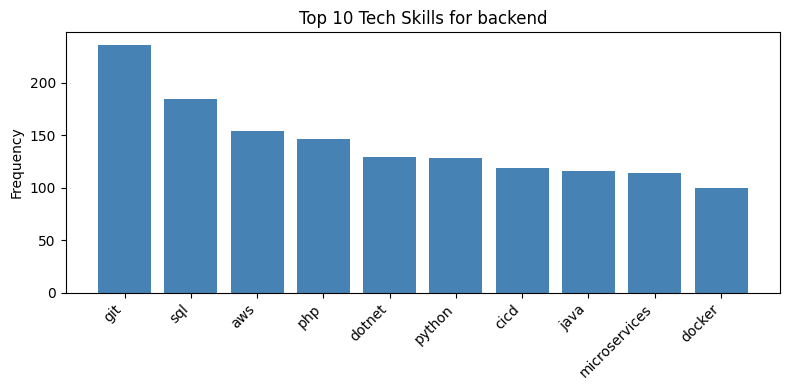

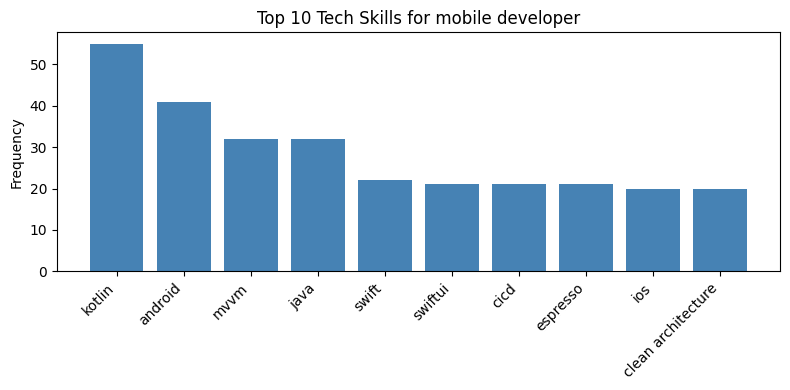

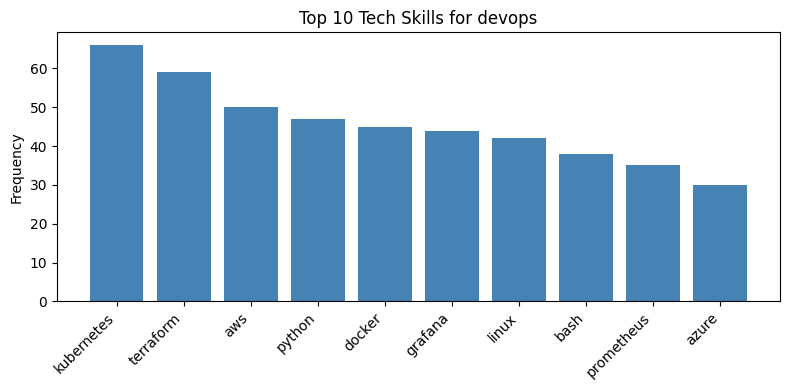

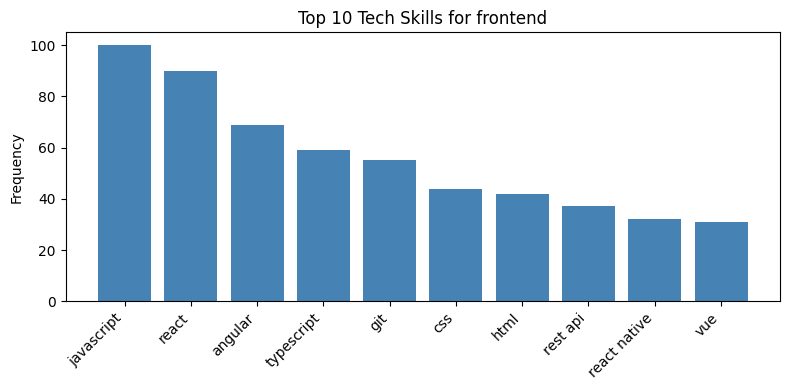

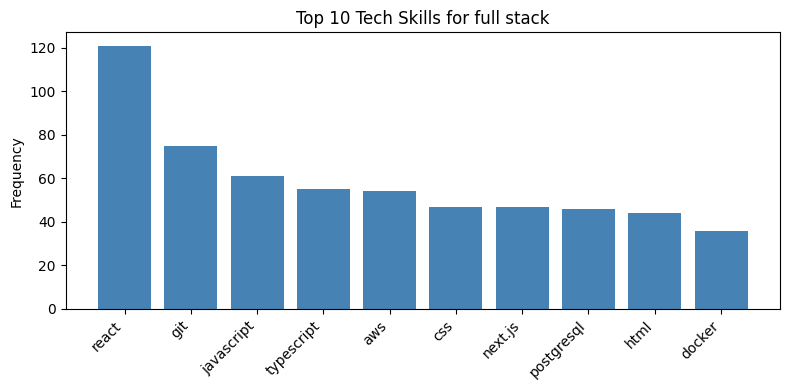

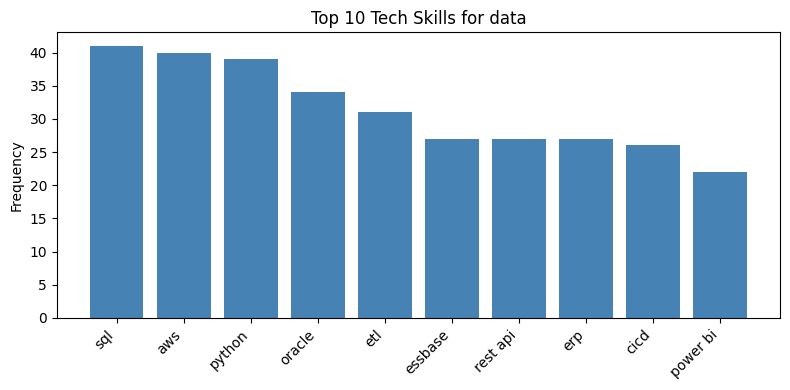

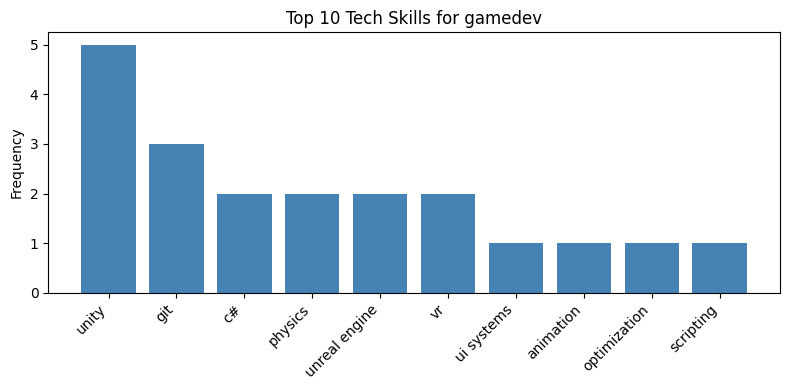

In [22]:
# Create DataFrame for tech skills counts
# Plot tech skills (top 10 per job)
for job in filtered_df['generic_title'].unique():
    tech_counts = tech_data[job].most_common(10)
    if tech_counts:
        skills, counts = zip(*tech_counts)
        plt.figure(figsize=(8, 4))
        plt.bar(skills, counts, color='steelblue')
        plt.title(f'Top 10 Tech Skills for {job}')
        plt.xticks(rotation=45, ha='right')
        plt.ylabel('Frequency')
        plt.tight_layout()
        plt.show()

# Plot soft skills (top 10 per job)
# for job in filtered_df['generic_title'].unique():
#     soft_counts = soft_data[job].most_common(10)
#     if soft_counts:
#         skills, counts = zip(*soft_counts)
#         plt.figure(figsize=(8, 4))
#         plt.bar(skills, counts, color='indianred')
#         plt.title(f'Top 10 Soft Skills for {job}')
#         plt.xticks(rotation=45, ha='right')
#         plt.ylabel('Frequency')
#         plt.tight_layout()
#         plt.show()


## Hard skills table

In [23]:
# Display
# print("\n=== Top 25 Tech Skills per Job ===")
display(tech_ranked_df)

backend         mobile developer               devops  \
Rank 1             git (236)              kotlin (55)      kubernetes (66)   
Rank 2             sql (184)             android (41)       terraform (59)   
Rank 3             aws (154)                mvvm (32)             aws (50)   
Rank 4             php (146)                java (32)          python (47)   
Rank 5          dotnet (129)               swift (22)          docker (45)   
Rank 6          python (128)             swiftui (21)         grafana (44)   
Rank 7            cicd (119)                cicd (21)           linux (42)   
Rank 8            java (116)            espresso (21)            bash (38)   
Rank 9   microservices (114)                 ios (20)      prometheus (35)   
Rank 10         docker (100)  clean architecture (20)           azure (30)   
Rank 11           azure (92)              gradle (20)         ansible (30)   
Rank 12      javascript (92)               junit (20)         jenkins (28)   
Rank 13           mysql (87)             flutter (15)            cicd (24)   
Rank 14         laravel (76)                 aws (14)         windows (17)   
Rank 15          golang (73)               react (14)  cloudformation (16)   
Rank 16      postgresql (73)          kubernetes (14)      postgresql (15)   
Rank 17           kafka (70)           terraform (14)           mysql (14)   
Rank 18         symfony (63)         android sdk (13)      powershell (12)   
Rank 19            rest (62)     jetpack compose (13)          gitlab (11)   
Rank 20          csharp (62)              docker (11)             gcp (11)   
Rank 21           linux (61)          websockets (10)             elk (10)   
Rank 22             gcp (60)               agile (10)       gitlab ci (10)   
Rank 23   elasticsearch (58)                http (10)       sonarqube (10)   
Rank 24           react (45)                oauth (9)     artifactory (10)   
Rank 25          spring (45)                scrum (9)           consul (9)   

                  frontend       full stack                   data  \
Rank 1    javascript (100)      react (121)               sql (41)   
Rank 2          react (90)         git (75)               aws (40)   
Rank 3        angular (69)  javascript (61)            python (39)   
Rank 4     typescript (59)  typescript (55)            oracle (34)   
Rank 5            git (55)         aws (54)               etl (31)   
Rank 6            css (44)         css (47)           essbase (27)   
Rank 7           html (42)     next.js (47)          rest api (27)   
Rank 8       rest api (37)  postgresql (46)               erp (27)   
Rank 9   react native (32)        html (44)              cicd (26)   
Rank 10           vue (31)      docker (36)          power bi (22)   
Rank 11        docker (24)     mongodb (33)            docker (20)   
Rank 12       node.js (24)         sql (33)               oic (20)   
Rank 13     socket.io (24)      nodejs (29)               epm (20)   
Rank 14          vite (14)         gcp (29)  microsoft office (17)   
Rank 15       webpack (14)       azure (27)             spark (16)   
Rank 16          sass (13)     nest.js (26)        postgresql (16)   
Rank 17          cicd (12)       mysql (24)           tableau (16)   
Rank 18         azure (12)        cicd (24)  data warehousing (14)   
Rank 19         html5 (11)     node.js (23)         smartview (14)   
Rank 20  restful apis (11)     graphql (21)     data modeling (13)   
Rank 21         typo3 (11)      dotnet (20)               git (13)   
Rank 22    typoscript (11)   terraform (20)        kubernetes (13)   
Rank 23          scss (11)          c# (18)             nosql (13)   
Rank 24        github (11)      nextjs (17)   microsoft excel (12)   
Rank 25          css3 (10)        java (16)              pbcs (12)   

                       gamedev  
Rank 1               unity (5)  
Rank 2                 git (3)  
Rank 3                  c# (2)  
Rank 4             physics (2)  
Rank 5

## Soft skills table

In [24]:
# print("\n=== Top 25 Soft Skills per Job ===")
# display(soft_ranked_df)

## Job positions open

/tmp/ipykernel_558745/1874332190.py:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(job_date_counts))


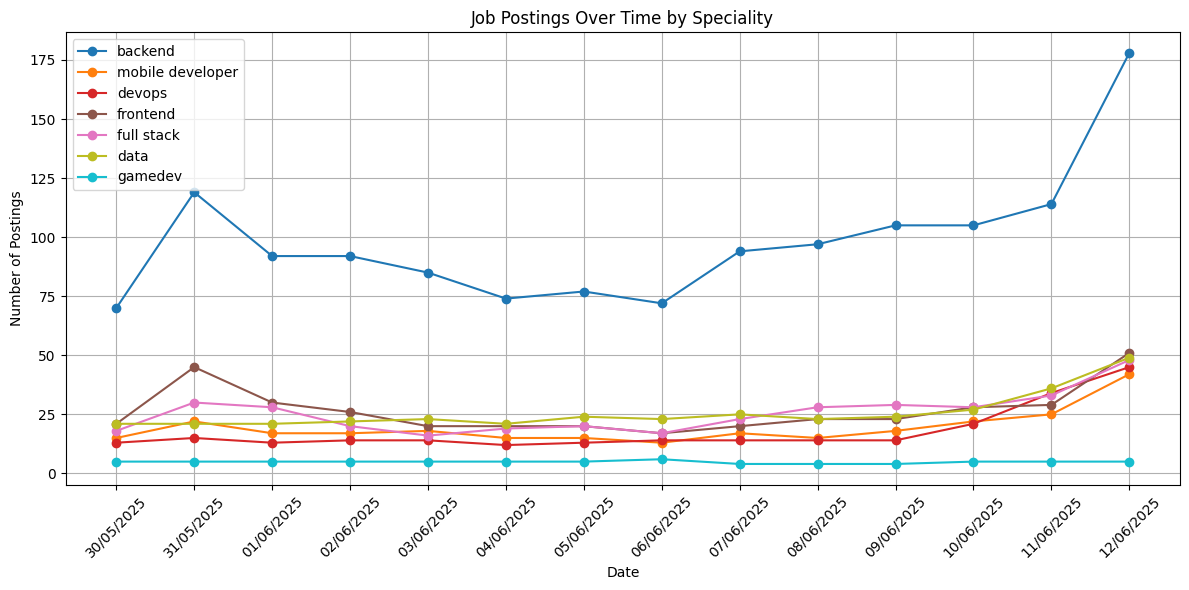

In [25]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from collections import defaultdict
from utils import parse_date

# Prepare dictionary: {job_title: Counter({date: count})}
job_date_counts = defaultdict(Counter)

# Iterate through rows to populate job_date_counts
for _, row in filtered_df.iterrows():
    job = row['generic_title']
    occurrences = row['occurrences']
    if not occurrences:
        continue
    if isinstance(occurrences, str):
        occurrences = [occurrences]
    for date_str in occurrences:
        date = parse_date(date_str)
        if date:
            job_date_counts[job][date] += 1

# Plot
plt.figure(figsize=(12, 6))

# Choose distinct colors automatically
colors = plt.cm.get_cmap('tab10', len(job_date_counts))

for i, (job, date_counter) in enumerate(job_date_counts.items()):
    sorted_dates = sorted(date_counter.items())
    if not sorted_dates:
        continue
    dates, counts = zip(*sorted_dates)
    plt.plot(dates, counts, label=job, color=colors(i), marker='o')

# Formatting
plt.title("Job Postings Over Time by Speciality")
plt.xlabel("Date")
plt.ylabel("Number of Postings")
plt.grid(True)
plt.legend()
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Most common occurences of keywords

## Responsabilities

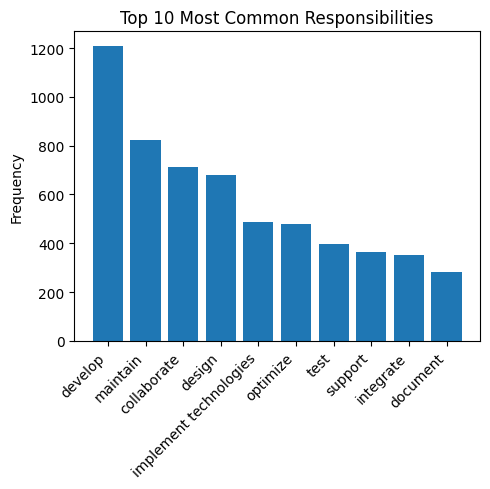

Full list of consolidated responsibilities term frequencies:

develop              1208
maintain             825
collaborate          712
design               679
implement technologies 488
optimize             477
test                 398
support              364
integrate            350
document             281
manage               223
improve              196
troubleshoot         193
monitor              189
deploy               187
debug                183
review               180
analyze              174
build                104
deliver              104
ensure               100
lead                 89
mentor               85
create test cases    85
scale                82
research             81
resolve              78
generate             65
participate          59
configure            57
identify             57
share                57
plan                 54
write                52
edit                 50
evaluate             48
automate             47
coordinate           46
en

In [26]:
tech_counts, tech_clusters = analyze_and_visualize_consolidated_terms(df, 'responsibilities', similarity_threshold=0.34, n=2, top_n=10, 
                                     figsize=(5, 5), rotation=45, show_details=True)

## Hard Skills

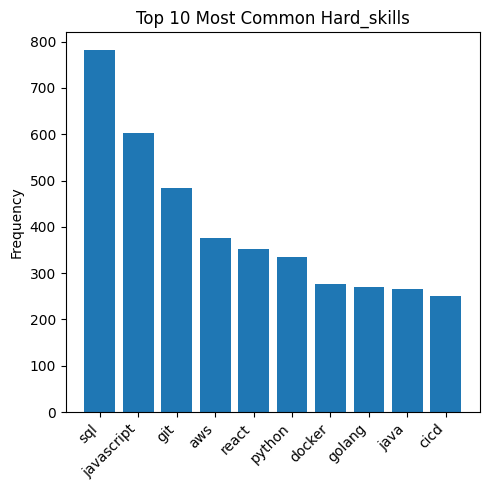

Full list of consolidated hard_skills term frequencies:

sql                  781
javascript           603
git                  484
aws                  376
react                352
python               334
docker               276
golang               271
java                 266
cicd                 250
rest                 244
css                  240
html                 239
web services         225
dotnet               217
linux                210
postgresql           210
php                  199
azure                186
kubernetes           178
spring boot          127
terraform            124
android              121
oracle               120
kafka                119
mongodb              111
nodejs               109
gcp                  107
sql server           106
c++                  100
microsoft office     97
cypress              95
nagios               90
kotlin               88
nestjs               87
laravel              85
vue                  79
oop                  77
s

In [27]:
tech_counts, tech_clusters = analyze_and_visualize_consolidated_terms(df, 'hard_skills', similarity_threshold=0.34, n=2, top_n=10, 
                                     figsize=(5, 5), rotation=45, show_details=True)

### v2

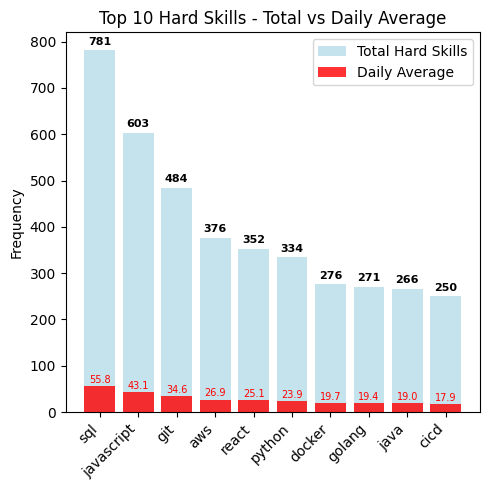

In [28]:
benefits_counts, benefits_clusters, daily_avg = analyze_and_visualize_consolidated_terms_v2(
    df, 'hard_skills', 
    similarity_threshold=0.34, 
    n=2, 
    top_n=10, 
    figsize=(5, 5), 
    rotation=45, 
    show_details=True,
    show_daily_average=True,  # Enable daily average calculation
    silent=True
)

## Soft Skills

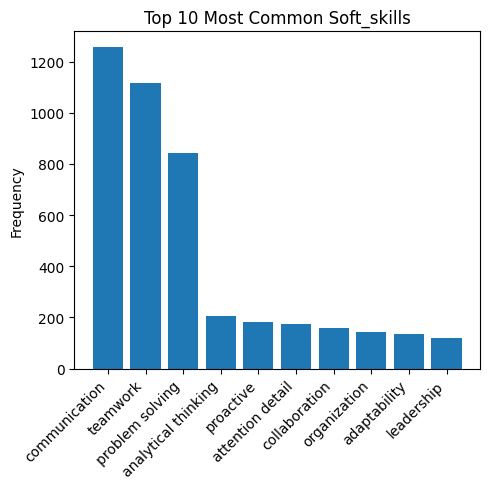

Full list of consolidated soft_skills term frequencies:

communication        1256
teamwork             1118
problem solving      844
analytical thinking  205
proactive            180
attention detail     175
collaboration        157
organization         144
adaptability         135
leadership           119
motivated            98
learning             74
responsibility       60
detail oriented      59
independence         54
creativity           50
initiative           47
fast learner         40
interpersonal        30
time management      28
growth mindset       28
flexibility          24
results-focused      23
curiosity            21
documentation        20
strategic thinking   19
mentorship           15
flexible thinking    14
multitasking         12
research             12
results-oriented     11
planning             10
negotiation          9
analysis             9
autonomous           8
listening            7
ambition             6
innovation           6
diligence            6
pa

In [29]:
soft_counts, soft_clusters = analyze_and_visualize_consolidated_terms(df, 'soft_skills', similarity_threshold=0.4, n=2, top_n=10, 
                                     figsize=(5, 5), rotation=45, show_details=True)

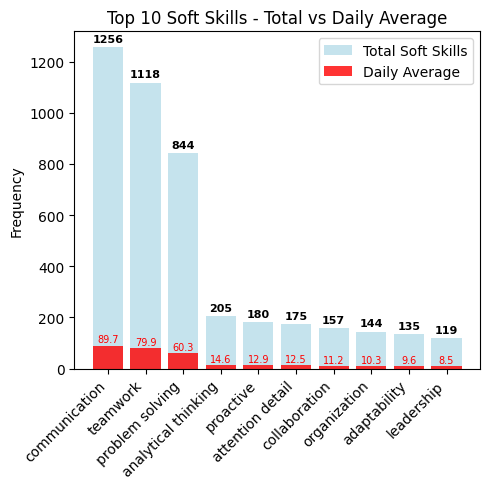

In [30]:
benefits_counts, benefits_clusters, daily_avg = analyze_and_visualize_consolidated_terms_v2(
    df, 'soft_skills', 
    similarity_threshold=0.4, 
    n=2, 
    top_n=10, 
    figsize=(5, 5), 
    rotation=45, 
    show_details=True,
    show_daily_average=True,  # Enable daily average calculation
    silent=True
)

## Benefits

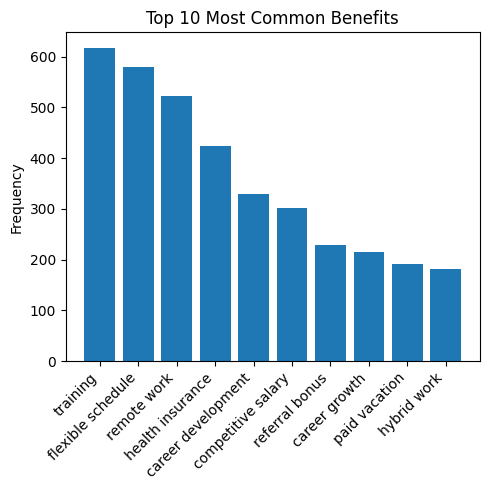

Full list of consolidated benefits term frequencies:

training             617
flexible schedule    580
remote work          523
health insurance     423
career development   329
competitive salary   302
referral bonus       228
career growth        215
paid vacation        192
hybrid work          181
english courses      172
professional growth  123
language classes     114
team building        101
corporate gifts      98
transport            83
growth opportunities 80
sick leave           78
social package       71
sports compensation  66
paid lunch           64
unlimited pto        64
comprehensive benefits 58
education bonuses    56
work-life balance    53
modern office        51
birthday certificate 47
fitness discounts    42
medical reimbursement 41
paid holidays        41
childcare budget     39
maternity leave      37
meal tickets         36
company perks        32
continuous learning  32
equipment            31
performance bonus    31
gym membership       29
travel           

In [31]:
benefits_counts, benefits_clusters = analyze_and_visualize_consolidated_terms(df, 'benefits', similarity_threshold=0.3, n=2, top_n=10, 
                                     figsize=(5, 5), rotation=45, show_details=True)

### v2

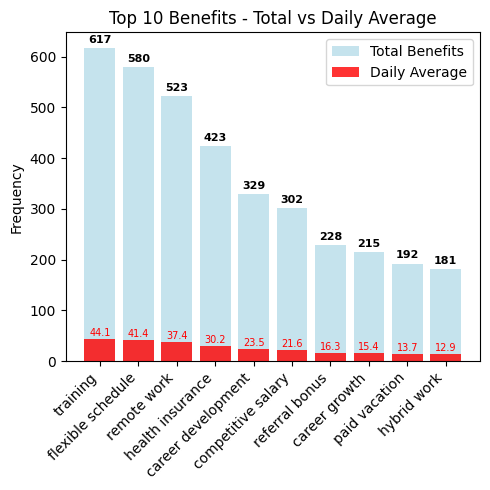

In [32]:
benefits_counts, benefits_clusters, daily_avg = analyze_and_visualize_consolidated_terms_v2(
    df, 'benefits', 
    similarity_threshold=0.3, 
    n=2, 
    top_n=10, 
    figsize=(5, 5), 
    rotation=45, 
    show_details=True,
    show_daily_average=True,  # Enable daily average calculation
    silent=True
)

## Languages

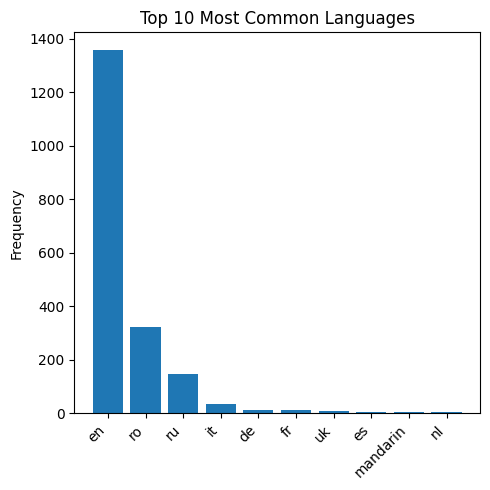

Full list of consolidated languages term frequencies:

en                   1357
ro                   321
ru                   145
it                   33
de                   12
fr                   12
uk                   8
es                   6
mandarin             3
nl                   3
sv                   2

Consolidation details:


In [33]:
benefits_counts, benefits_clusters = analyze_and_visualize_consolidated_terms(df, 'languages', similarity_threshold=0.3, n=2, top_n=10, 
                                     figsize=(5, 5), rotation=45, show_details=True)

## Education

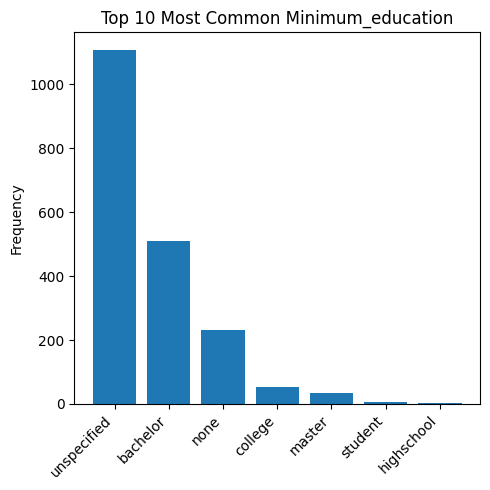

Full list of consolidated minimum_education term frequencies:

unspecified          1107
bachelor             509
none                 231
college              52
master               33
student              5
highschool           4

Consolidation details:


In [34]:
benefits_counts, benefits_clusters = analyze_and_visualize_consolidated_terms(df, 'minimum_education', similarity_threshold=0.3, n=2, top_n=10, 
                                     figsize=(5, 5), rotation=45, show_details=True)

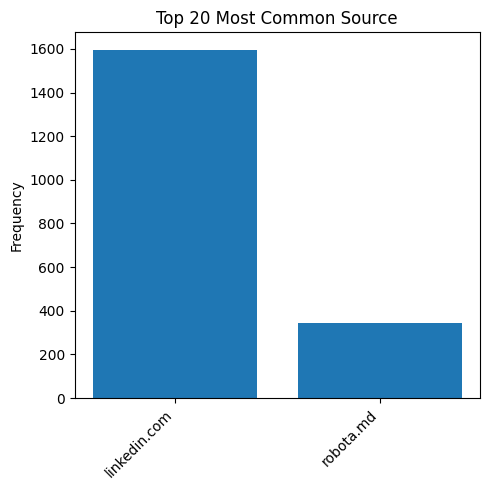

Full list of consolidated source term frequencies:

linkedin.com         1596
robota.md            345

Consolidation details:


In [35]:
benefits_counts, benefits_clusters = analyze_and_visualize_consolidated_terms(df, 'source', similarity_threshold=0.5, n=2, top_n=20, 
                                     figsize=(5, 5), rotation=45, show_details=True)

## Company Name

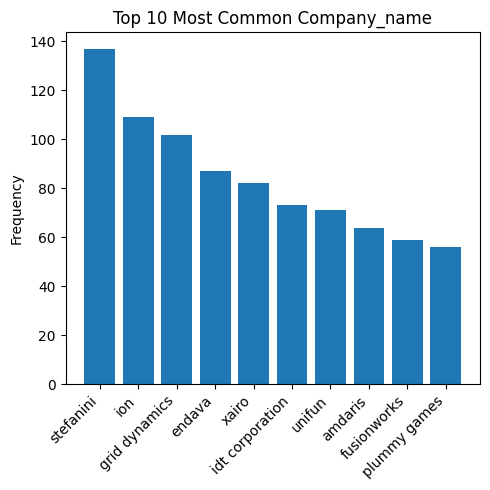

Full list of consolidated company_name term frequencies:

stefanini            137
ion                  109
grid dynamics        102
endava               87
xairo                82
idt corporation      73
unifun               71
amdaris              64
fusionworks          59
plummy games         56
starnet              47
mixbook              41
ruby labs            39
kivork               38
gilat satellite networks 37
infuse               36
mindrift             35
insomniac design     35
capslock             30
appsfactory          22
threecolts           19
backstageit          17
gr8 tech             17
extole               17
bairesdev            17
createq              17
maib                 16
fyst                 15
orange systems       14
orange moldova       12
salt edge            12
confidential co.     12
coherent solutions   11
micro1               11
us software solutions 11
7code                11
adtelligent          10
developmentaid       10
hr consulting        9

In [36]:
benefits_counts, benefits_clusters = analyze_and_visualize_consolidated_terms(df, 'company_name', similarity_threshold=0.5, n=2, top_n=10, 
                                     figsize=(5, 5), rotation=45, show_details=True)

### v2

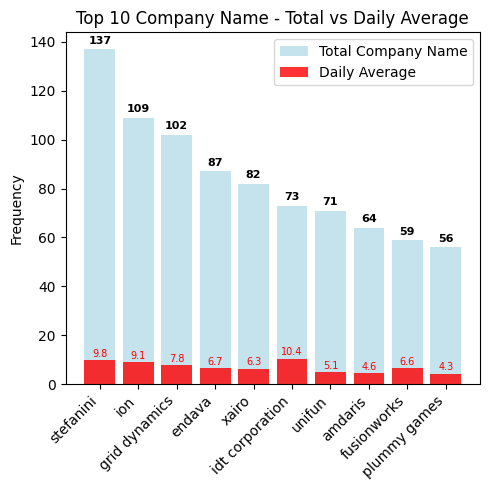

In [37]:
benefits_counts, benefits_clusters, daily_avg = analyze_and_visualize_consolidated_terms_v2(
    df, 'company_name', 
    similarity_threshold=0.5, 
    n=2, 
    top_n=10, 
    figsize=(5, 5), 
    rotation=45, 
    show_details=True,
    show_daily_average=True,  # Enable daily average calculation
    silent=True
)

## Company Size

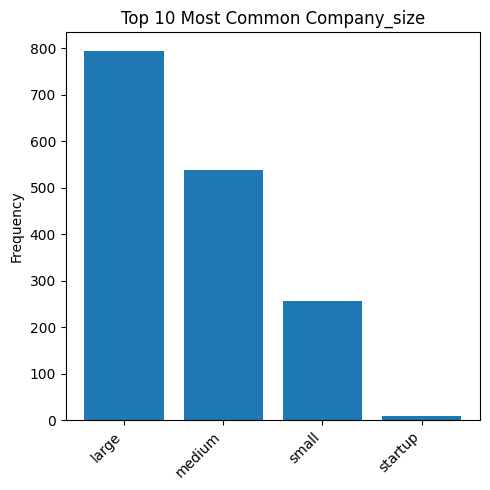

Full list of consolidated company_size term frequencies:

large                794
medium               538
small                255
startup              9

Consolidation details:


In [38]:
benefits_counts, benefits_clusters = analyze_and_visualize_consolidated_terms(df, 'company_size', similarity_threshold=0.4, n=2, top_n=10, 
                                     figsize=(5, 5), rotation=45, show_details=True)

### Company Size Skills Required

In [39]:
import pandas as pd
from collections import Counter

# Filter rows where company_size is available
filtered_df = df[df['company_size'].notna()]

# Store counts per company size
skill_data = {}

for size in filtered_df['company_size'].unique():
    subset = filtered_df[filtered_df['company_size'] == size]
    
    skills = [skill for skills_list in subset['hard_skills'].dropna() 
              for skill in (skills_list if isinstance(skills_list, list) else [skills_list])]
    
    skill_counts = Counter(skills)
    skill_data[size] = skill_counts

# Build ranked table: rows = Rank 1..N, columns = company sizes
def build_ranked_df(skill_data, top_n=10):
    sizes = list(skill_data.keys())
    ranked_dict = {size: [] for size in sizes}
    
    for size in sizes:
        top_skills = skill_data[size].most_common(top_n)
        ranked_dict[size] = [f"{skill} ({count})" for skill, count in top_skills]
        
        # Pad with empty strings
        if len(ranked_dict[size]) < top_n:
            ranked_dict[size].extend([''] * (top_n - len(ranked_dict[size])))
    
    ranked_df = pd.DataFrame(ranked_dict, index=[f"Rank {i+1}" for i in range(top_n)])
    return ranked_df

# Generate and show the ranked DataFrame
hard_skills_ranked_df = build_ranked_df(skill_data, top_n=15)
hard_skills_ranked_df


large           medium               startup  \
Rank 1          sql (230)        sql (148)               git (5)   
Rank 2          aws (206)        git (134)         wordpress (4)   
Rank 3       python (205)         aws (94)            python (4)   
Rank 4         cicd (190)  postgresql (94)             pyqt5 (4)   
Rank 5   javascript (174)       linux (91)             pyqt6 (4)   
Rank 6          git (168)      docker (85)           tkinter (4)   
Rank 7         java (154)        java (79)            pandas (4)   
Rank 8       dotnet (150)       mysql (77)          openpyxl (4)   
Rank 9       docker (144)       react (71)                1c (4)   
Rank 10       azure (131)     android (68)       com interop (4)   
Rank 11       oracle (98)  kubernetes (68)              html (2)   
Rank 12   sql server (95)         ios (63)               css (2)   
Rank 13         html (95)         c++ (60)               php (2)   
Rank 14        react (93)  typescript (60)          frontend (1)   
Rank 15          gcp (93)      python (59)  website building (1)   

                    small  
Rank 1   javascript (120)  
Rank 2        react (116)  
Rank 3          git (100)  
Rank 4           php (67)  
Rank 5       laravel (58)  
Rank 6      rest api (57)  
Rank 7       angular (53)  
Rank 8    typescript (51)  
Rank 9           aws (51)  
Rank 10        mysql (41)  
Rank 11       kotlin (30)  
Rank 12          css (30)  
Rank 13         html (29)  
Rank 14       python (29)  
Rank 15       lambda (29)

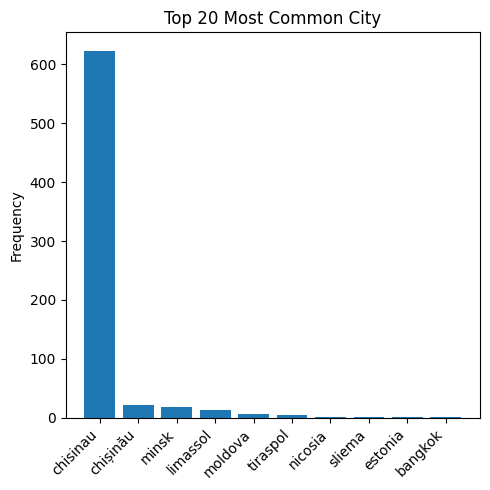

Full list of consolidated city term frequencies:

chisinau             623
chișinău             22
minsk                19
limassol             13
moldova              7
tiraspol             5
nicosia              2
sliema               1
estonia              1
bangkok              1

Consolidation details:


In [40]:
benefits_counts, benefits_clusters = analyze_and_visualize_consolidated_terms(df, 'city', similarity_threshold=0.4, n=2, top_n=20, 
                                     figsize=(5, 5), rotation=45, show_details=True)

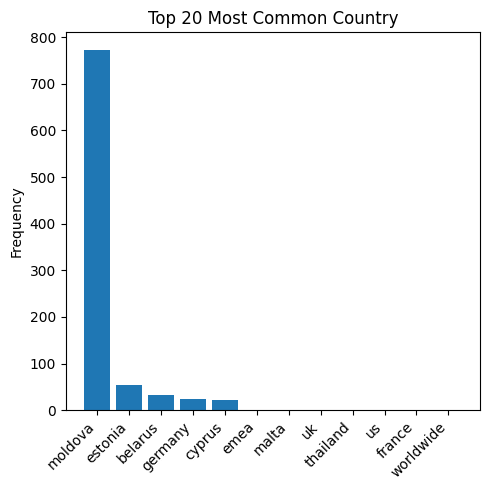

Full list of consolidated country term frequencies:

moldova              772
estonia              55
belarus              32
germany              24
cyprus               21
emea                 1
malta                1
uk                   1
thailand             1
us                   1
france               1
worldwide            1

Consolidation details:


In [41]:
benefits_counts, benefits_clusters = analyze_and_visualize_consolidated_terms(df, 'country', similarity_threshold=0.3, n=2, top_n=20, 
                                     figsize=(5, 5), rotation=45, show_details=True)

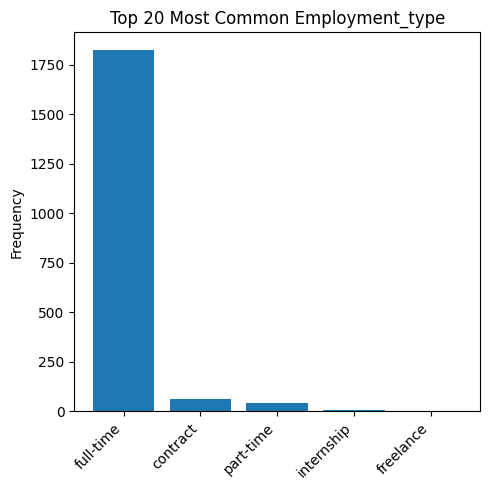

Full list of consolidated employment_type term frequencies:

full-time            1823
contract             60
part-time            41
internship           6
freelance            3

Consolidation details:


In [42]:
benefits_counts, benefits_clusters = analyze_and_visualize_consolidated_terms(df, 'employment_type', similarity_threshold=0.4, n=2, top_n=20, 
                                     figsize=(5, 5), rotation=45, show_details=True)

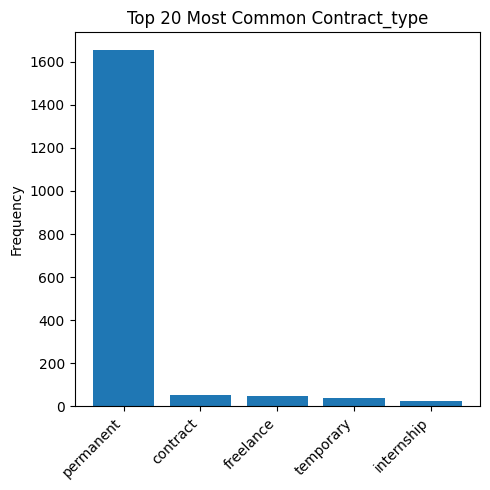

Full list of consolidated contract_type term frequencies:

permanent            1655
contract             54
freelance            50
temporary            39
internship           24

Consolidation details:


In [43]:
benefits_counts, benefits_clusters = analyze_and_visualize_consolidated_terms(df, 'contract_type', similarity_threshold=0.4, n=2, top_n=20, 
                                     figsize=(5, 5), rotation=45, show_details=True)

# Work Schedule

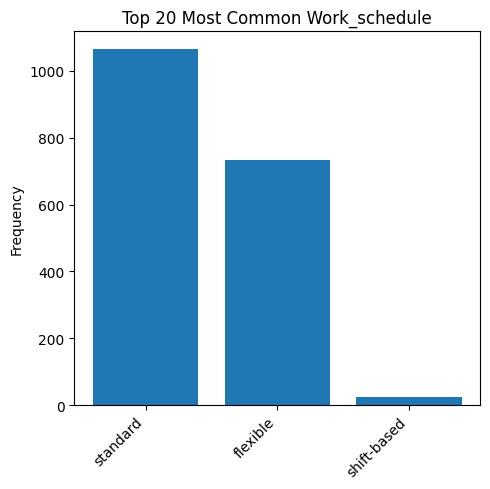

Full list of consolidated work_schedule term frequencies:

standard             1065
flexible             732
shift-based          25

Consolidation details:


In [44]:
benefits_counts, benefits_clusters = analyze_and_visualize_consolidated_terms(df, 'work_schedule', similarity_threshold=0.4, n=2, top_n=20, 
                                     figsize=(5, 5), rotation=45, show_details=True)

### v2

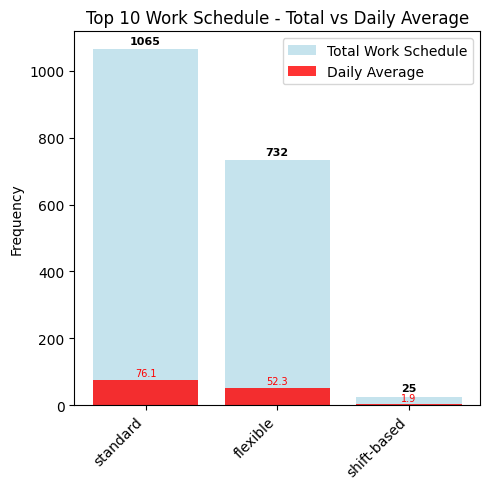

In [45]:
benefits_counts, benefits_clusters, daily_avg = analyze_and_visualize_consolidated_terms_v2(
    df, 'work_schedule', 
    similarity_threshold=0.4, 
    n=2, 
    top_n=10, 
    figsize=(5, 5), 
    rotation=45, 
    show_details=True,
    show_daily_average=True,  # Enable daily average calculation
    silent=True
)

# Remote Work

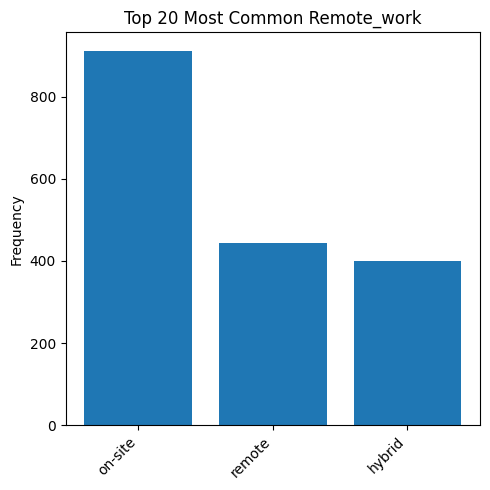

Full list of consolidated remote_work term frequencies:

on-site              912
remote               443
hybrid               401

Consolidation details:


In [46]:
benefits_counts, benefits_clusters = analyze_and_visualize_consolidated_terms(df, 'remote_work', similarity_threshold=0.3, n=2, top_n=20, 
                                     figsize=(5, 5), rotation=45, show_details=True)

### v2

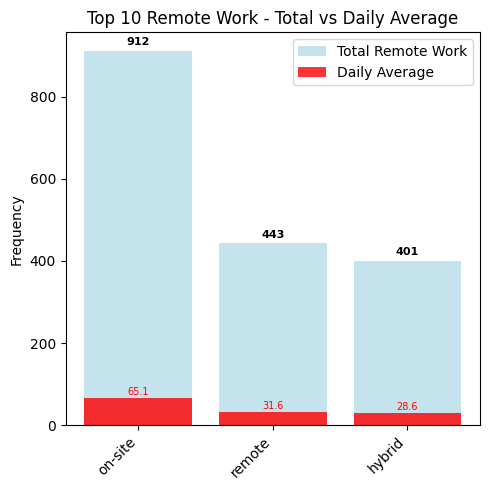

In [47]:
benefits_counts, benefits_clusters, daily_avg = analyze_and_visualize_consolidated_terms_v2(
    df, 'remote_work', 
    similarity_threshold=0.3, 
    n=2, 
    top_n=10, 
    figsize=(5, 5), 
    rotation=45, 
    show_details=True,
    show_daily_average=True,  # Enable daily average calculation
    silent=True
)

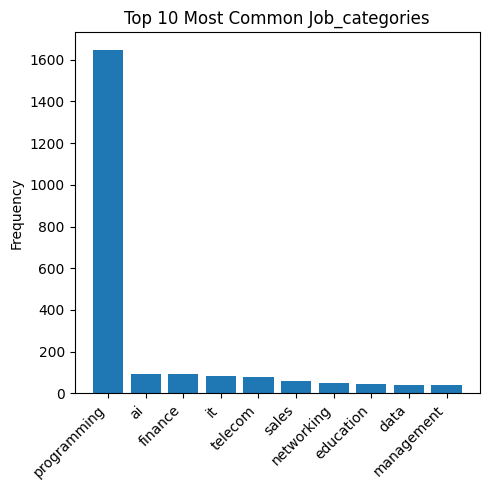

Full list of consolidated job_categories term frequencies:

programming          1648
ai                   92
finance              92
it                   82
telecom              77
sales                58
networking           52
education            47
data                 40
management           39
fintech              37
banking              36
video editing        31
business             24
it support           23
e-learning           21
system administration 20
automotive           20
cyber security       19
qa                   16
real estate          16
cloud                15
travel               14
design               14
it services          14
hr                   14
web development      12
technology           12
ecommerce            11
testing              9
analysis             9
engineering          8
renewable energy     8
consulting           7
devops               7
investment           7
gamedev              6
construction         6
accounting           4
data analyt

In [48]:
benefits_counts, benefits_clusters = analyze_and_visualize_consolidated_terms(df, 'job_categories', similarity_threshold=0.3, n=2, top_n=10, 
                                     figsize=(5, 5), rotation=45, show_details=True)

# Salary Currency

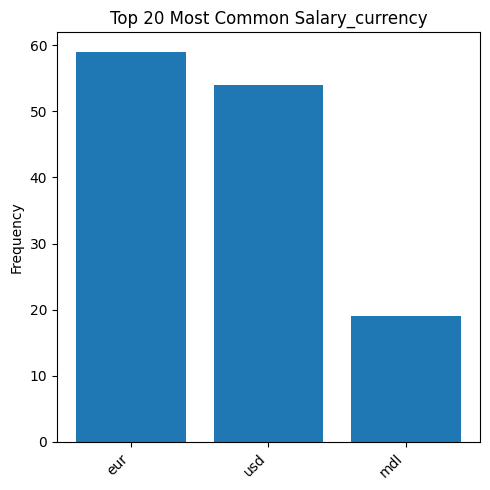

Full list of consolidated salary_currency term frequencies:

eur                  59
usd                  54
mdl                  19

Consolidation details:


In [49]:
benefits_counts, benefits_clusters = analyze_and_visualize_consolidated_terms(df, 'salary_currency', similarity_threshold=0.3, n=2, top_n=20, 
                                     figsize=(5, 5), rotation=45, show_details=True)

# Experience Distribution

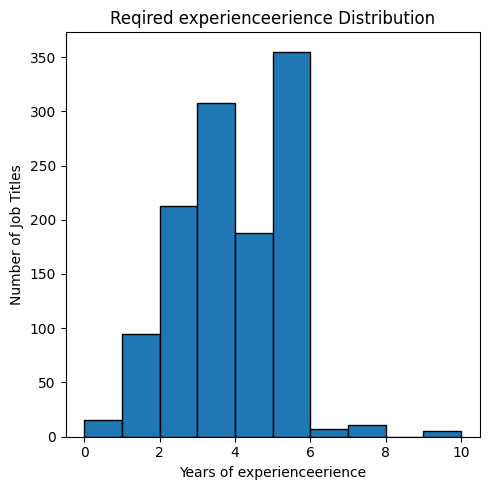

experienceerience Stats (After Dropping NaN):

count    1197.000000
mean        3.459482
std         1.465114
min         0.000000
25%         2.000000
50%         3.000000
75%         5.000000
max        10.000000
Name: experience, dtype: float64


In [50]:
df['experience'] = pd.to_numeric(df['experience'], errors='coerce')
df_clean = df.dropna(subset=['experience'])

# Plot experienceerience distribution
fig, ax = plt.subplots(figsize=(5, 5))
ax.hist(df_clean['experience'], bins=range(int(df_clean['experience'].min()), int(df_clean['experience'].max()) + 1), edgecolor='black')
ax.set_title('Reqired experienceerience Distribution')
ax.set_xlabel('Years of experienceerience')
ax.set_ylabel('Number of Job Titles')
plt.tight_layout()
plt.show()

# Print experienceerience stats for cleaned data
print("experienceerience Stats (After Dropping NaN):\n")
print(df_clean['experience'].describe())


# Salary distribution

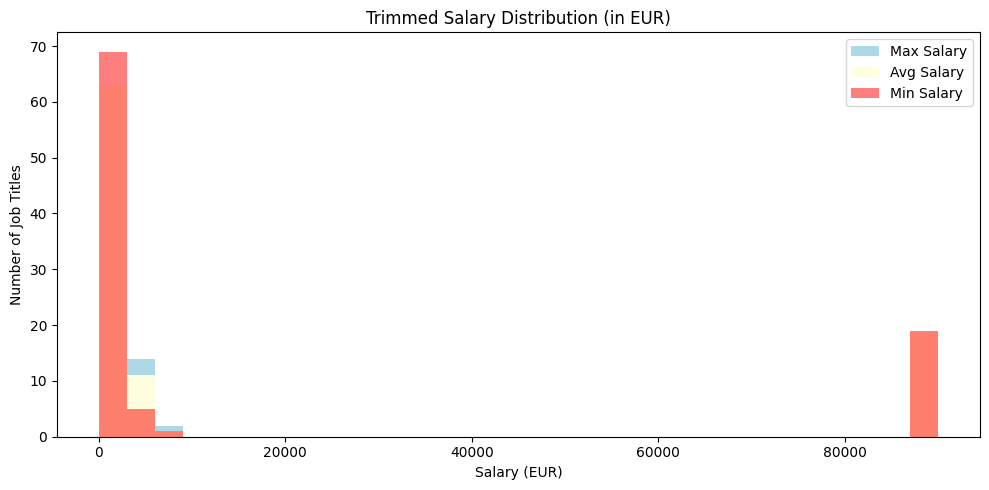

Salary Stats (on 94 salaries) (in EUR, After Conversion & Trimming):

       salary_min_eur  salary_avg_eur  salary_max_eur
count       94.000000       94.000000       94.000000
mean     19555.302766    19757.249574    19959.196383
std      35664.255176    35564.204221    35466.111899
min          6.160000       19.360000       22.000000
25%       1020.000000     1320.000000     1500.000000
50%       1870.000000     2020.000000     2500.000000
75%       3412.125000     3515.000000     4180.000000
max      90000.000000    90000.000000    90000.000000


In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming `df` is already loaded

# Conversion rates to EUR
currency_rates = {
    'usd': 0.88,
    'mdl': 0.051,
    'eur': 1.0,
    'gbp': 1.17
}

# Function to convert salary to EUR
def convert_to_eur(row):
    currency = (row.get('salary_currency') or '').lower()
    rate = currency_rates.get(currency)
    
    if rate and pd.notnull(row.get('min_salary')):
        min_salary_eur = row['min_salary'] * rate
        max_salary = row.get('max_salary')
        max_salary_eur = max_salary * rate if pd.notnull(max_salary) else None
    else:
        min_salary_eur = max_salary_eur = None
    
    return pd.Series([min_salary_eur, max_salary_eur])

# Convert salaries to EUR
df[['salary_min_eur', 'salary_max_eur']] = df.apply(convert_to_eur, axis=1)
df_clean = df.dropna(subset=['salary_min_eur', 'salary_max_eur']).copy()
df_clean['salary_avg_eur'] = (df_clean['salary_min_eur'] + df_clean['salary_max_eur']) / 2

# Sort and trim top/bottom 3 in each salary column
def trim_outliers(df, column, n=3, m=3):
    return df.sort_values(by=column).iloc[n:-m]

df_trimmed = df_clean.copy()
# for col in ['salary_min_eur', 'salary_avg_eur', 'salary_max_eur']:
#     df_trimmed = trim_outliers(df_trimmed, col, 3, 6)

# Plot salary distributions (trimmed)
plt.figure(figsize=(10, 5))
plt.hist(df_trimmed['salary_max_eur'], bins=30, alpha=1, label='Max Salary', color='lightblue')
plt.hist(df_trimmed['salary_avg_eur'], bins=30, alpha=1, label='Avg Salary', color='lightyellow')
plt.hist(df_trimmed['salary_min_eur'], bins=30, alpha=0.5, label='Min Salary', color='red')
plt.title('Trimmed Salary Distribution (in EUR)')
plt.xlabel('Salary (EUR)')
plt.ylabel('Number of Job Titles')
plt.legend()
plt.tight_layout()
plt.show()

# Print salary stats (trimmed)
print(f"Salary Stats (on {len(df_trimmed)} salaries) (in EUR, After Conversion & Trimming):\n")
print(df_trimmed[['salary_min_eur', 'salary_avg_eur', 'salary_max_eur']].describe())


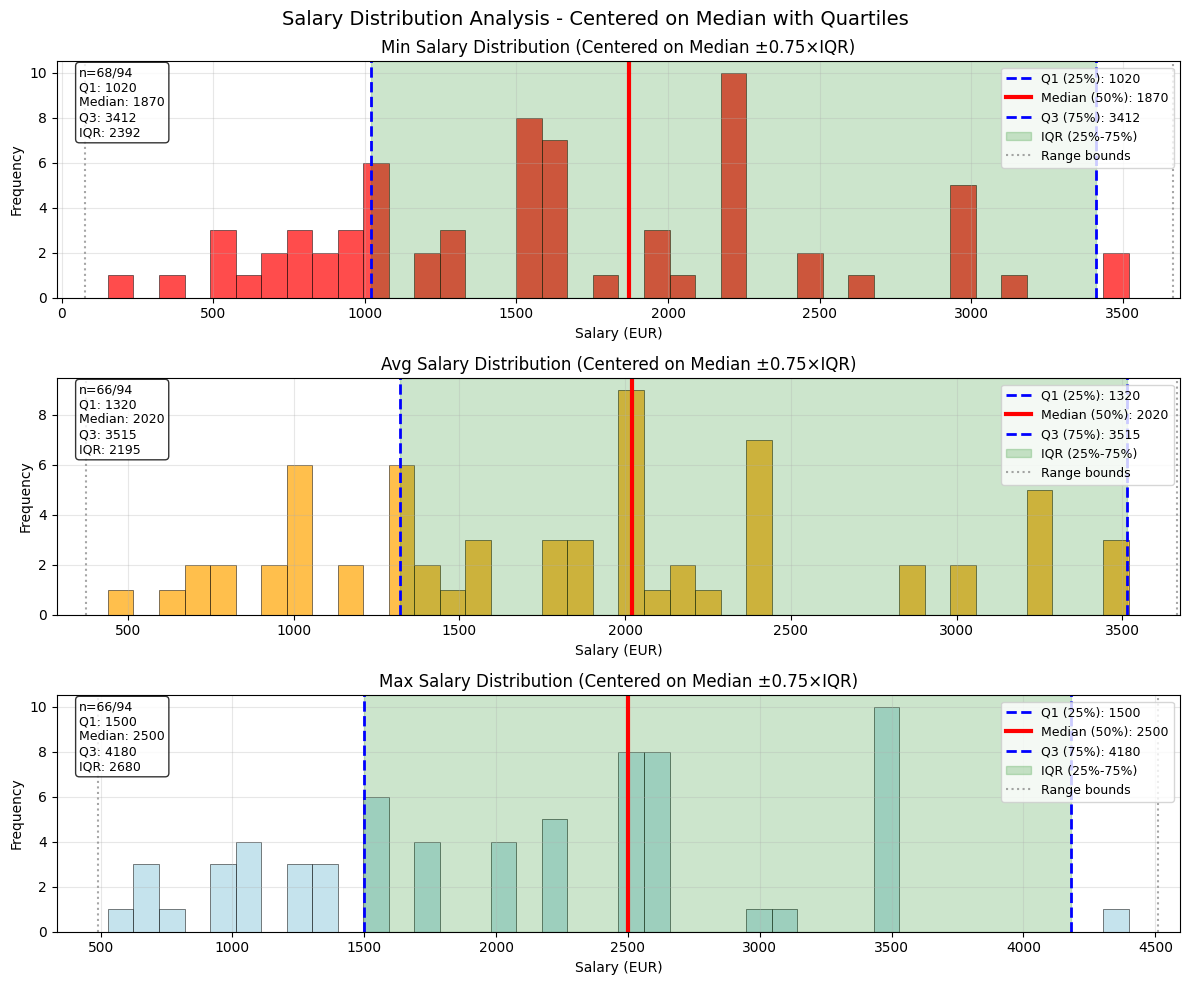

SALARY DISTRIBUTION SUMMARY (PERCENTILE-BASED)

Min Salary:
  Total samples: 94
  Samples in range: 74 (78.7%)
  Q1 (25th percentile): 1020 EUR
  Median (50th percentile): 1870 EUR
  Q3 (75th percentile): 3412 EUR
  IQR (Q3-Q1): 2392 EUR
  Range shown: -1718 to 5458 EUR
  Outliers excluded: 20

Avg Salary:
  Total samples: 94
  Samples in range: 73 (77.7%)
  Q1 (25th percentile): 1320 EUR
  Median (50th percentile): 2020 EUR
  Q3 (75th percentile): 3515 EUR
  IQR (Q3-Q1): 2195 EUR
  Range shown: -1272 to 5312 EUR
  Outliers excluded: 21

Max Salary:
  Total samples: 94
  Samples in range: 73 (77.7%)
  Q1 (25th percentile): 1500 EUR
  Median (50th percentile): 2500 EUR
  Q3 (75th percentile): 4180 EUR
  IQR (Q3-Q1): 2680 EUR
  Range shown: -1520 to 6520 EUR
  Outliers excluded: 21


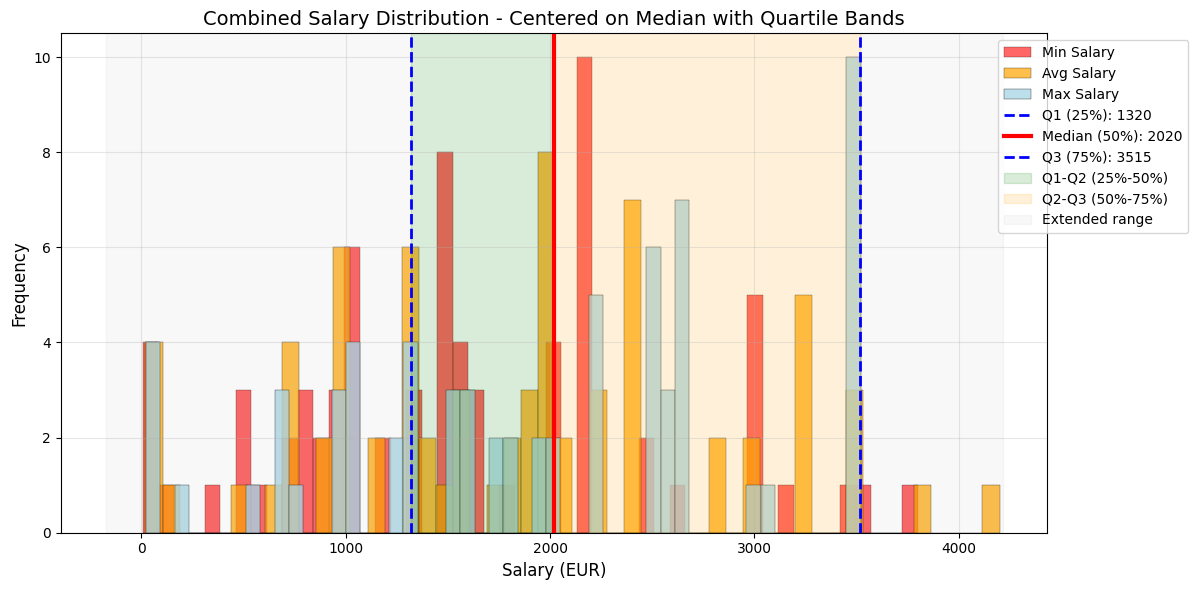

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ZOOM LEVEL CONFIGURATION
ZOOM_LEVEL = 0.75  # Adjust this value to zoom in/out (lower = more zoomed in)
COMBINED_ZOOM_LEVEL = 1  # Zoom level for the combined plot

# Assuming `df` is already loaded
# Conversion rates to EUR
currency_rates = {
    'usd': 0.88,
    'mdl': 0.051,
    'eur': 1.0,
    'gbp': 1.17
}

# Function to convert salary to EUR
def convert_to_eur(row):
    currency = (row.get('salary_currency') or '').lower()
    rate = currency_rates.get(currency)
    if rate and pd.notnull(row.get('min_salary')):
        min_salary_eur = row['min_salary'] * rate
        max_salary = row.get('max_salary')
        max_salary_eur = max_salary * rate if pd.notnull(max_salary) else None
    else:
        min_salary_eur = max_salary_eur = None
    return pd.Series([min_salary_eur, max_salary_eur])

# Convert salaries to EUR
df[['salary_min_eur', 'salary_max_eur']] = df.apply(convert_to_eur, axis=1)
df_clean = df.dropna(subset=['salary_min_eur', 'salary_max_eur']).copy()
df_clean['salary_avg_eur'] = (df_clean['salary_min_eur'] + df_clean['salary_max_eur']) / 2

# Function to get percentile-based range
def get_percentile_range(data, center_percentile=50, range_multiplier=3):
    """
    Get range based on percentiles, centered around median
    Uses IQR (Interquartile Range) for robust range calculation
    """
    q25 = data.quantile(0.25)
    q50 = data.quantile(0.50)  # median
    q75 = data.quantile(0.75)
    
    iqr = q75 - q25  # Interquartile Range
    
    # Center around median, extend by range_multiplier * IQR
    lower_bound = q50 - (range_multiplier * iqr)
    upper_bound = q50 + (range_multiplier * iqr)
    
    return lower_bound, upper_bound, q25, q50, q75, iqr

# Create subplot for all three salary types
fig, axes = plt.subplots(3, 1, figsize=(12, 10))
salary_columns = ['salary_min_eur', 'salary_avg_eur', 'salary_max_eur']
colors = ['red', 'orange', 'lightblue']
labels = ['Min Salary', 'Avg Salary', 'Max Salary']

for i, (col, color, label) in enumerate(zip(salary_columns, colors, labels)):
    data = df_clean[col]
    
    # Get percentile-based range (centered on median)
    lower_bound, upper_bound, q25, q50, q75, iqr = get_percentile_range(data, range_multiplier=ZOOM_LEVEL)
    
    # Filter data to the centered range
    filtered_data = data[(data >= lower_bound) & (data <= upper_bound)]
    
    # Plot histogram
    axes[i].hist(filtered_data, bins=40, alpha=0.7, color=color, edgecolor='black', linewidth=0.5)
    
    # Add vertical lines for quartiles
    axes[i].axvline(q25, color='blue', linestyle='--', linewidth=2, label=f'Q1 (25%): {q25:.0f}')
    axes[i].axvline(q50, color='red', linestyle='-', linewidth=3, label=f'Median (50%): {q50:.0f}')
    axes[i].axvline(q75, color='blue', linestyle='--', linewidth=2, label=f'Q3 (75%): {q75:.0f}')
    
    # Add IQR shading
    axes[i].axvspan(q25, q75, alpha=0.2, color='green', label='IQR (25%-75%)')
    
    # Add range boundaries
    axes[i].axvline(lower_bound, color='gray', linestyle=':', alpha=0.7, label='Range bounds')
    axes[i].axvline(upper_bound, color='gray', linestyle=':', alpha=0.7)
    
    # Set title and labels
    axes[i].set_title(f'{label} Distribution (Centered on Median ±{ZOOM_LEVEL}×IQR)', fontsize=12)
    axes[i].set_xlabel('Salary (EUR)')
    axes[i].set_ylabel('Frequency')
    axes[i].legend(loc='upper right', fontsize=9)
    axes[i].grid(True, alpha=0.3)
    
    # Add text box with statistics
    stats_text = f'n={len(filtered_data)}/{len(data)}\nQ1: {q25:.0f}\nMedian: {q50:.0f}\nQ3: {q75:.0f}\nIQR: {iqr:.0f}'
    axes[i].text(0.02, 0.98, stats_text, transform=axes[i].transAxes, 
                verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8),
                fontsize=9)

plt.suptitle('Salary Distribution Analysis - Centered on Median with Quartiles', fontsize=14, y=0.98)
plt.tight_layout()
plt.show()

# Summary statistics
print("="*60)
print("SALARY DISTRIBUTION SUMMARY (PERCENTILE-BASED)")
print("="*60)

for col, label in zip(salary_columns, labels):
    data = df_clean[col]
    lower_bound, upper_bound, q25, q50, q75, iqr = get_percentile_range(data, range_multiplier=1.5)
    filtered_data = data[(data >= lower_bound) & (data <= upper_bound)]
    
    print(f"\n{label}:")
    print(f"  Total samples: {len(data)}")
    print(f"  Samples in range: {len(filtered_data)} ({len(filtered_data)/len(data)*100:.1f}%)")
    print(f"  Q1 (25th percentile): {q25:.0f} EUR")
    print(f"  Median (50th percentile): {q50:.0f} EUR")
    print(f"  Q3 (75th percentile): {q75:.0f} EUR")
    print(f"  IQR (Q3-Q1): {iqr:.0f} EUR")
    print(f"  Range shown: {lower_bound:.0f} to {upper_bound:.0f} EUR")
    print(f"  Outliers excluded: {len(data) - len(filtered_data)}")

# Combined plot centered on median with quartile bands
plt.figure(figsize=(12, 6))

# Use average salary for the main analysis
main_data = df_clean['salary_avg_eur']
lower_bound, upper_bound, q25, q50, q75, iqr = get_percentile_range(main_data, range_multiplier=COMBINED_ZOOM_LEVEL)

# Filter all data to this range
for col, color, label, alpha in zip(salary_columns, ['red', 'orange', 'lightblue'], labels, [0.6, 0.7, 0.8]):
    filtered_data = df_clean[col][(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    plt.hist(filtered_data, bins=50, alpha=alpha, color=color, label=label, edgecolor='black', linewidth=0.3)

# Add quartile lines
plt.axvline(q25, color='blue', linestyle='--', linewidth=2, label=f'Q1 (25%): {q25:.0f}')
plt.axvline(q50, color='red', linestyle='-', linewidth=3, label=f'Median (50%): {q50:.0f}')
plt.axvline(q75, color='blue', linestyle='--', linewidth=2, label=f'Q3 (75%): {q75:.0f}')

# Add quartile bands
plt.axvspan(q25, q50, alpha=0.15, color='green', label='Q1-Q2 (25%-50%)')
plt.axvspan(q50, q75, alpha=0.15, color='orange', label='Q2-Q3 (50%-75%)')

# Add extended range indicators
plt.axvspan(q50 - iqr, q25, alpha=0.05, color='gray', label='Extended range')
plt.axvspan(q75, q50 + iqr, alpha=0.05, color='gray')

plt.title('Combined Salary Distribution - Centered on Median with Quartile Bands', fontsize=14)
plt.xlabel('Salary (EUR)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Salary per specialization

In [53]:
df_clean_salaries = df_trimmed.copy()
filtered_df = df_clean_salaries[df_clean_salaries['generic_title'].notna()].copy()

# Analysis by job specialty
job_specialties = filtered_df['generic_title'].value_counts()
print("Job Specialties Distribution:")
for specialty, count in job_specialties.items():
    print(f"{specialty}: {count} positions")
print("\n" + "="*80 + "\n")

# Create salary analysis for each specialty with sufficient data (at least 3 positions)
min_positions = 3
specialties_with_data = job_specialties[job_specialties >= min_positions].index

# Calculate stats for each specialty
specialty_stats = {}
for specialty in specialties_with_data:
    specialty_data = filtered_df[filtered_df['generic_title'] == specialty]
    specialty_stats[specialty] = specialty_data[['salary_min_eur', 'salary_avg_eur', 'salary_max_eur']].describe()

# Print detailed stats for each specialty
for specialty in specialties_with_data:
    specialty_data = filtered_df[filtered_df['generic_title'] == specialty]
    count = len(specialty_data)
    
    print(f"{specialty.upper()} Salary Stats (on {count} salaries)(in EUR, After Conversion):\n")
    print(specialty_stats[specialty])
    print("\n" + "-"*60 + "\n")

# Summary table of all specialties
print("SALARY SUMMARY BY JOB SPECIALTY (in EUR):")
print("="*80)

summary_data = []
for specialty in df_clean_salaries['generic_title'].unique():
    specialty_data = df_clean_salaries[df_clean_salaries['generic_title'] == specialty]
    if len(specialty_data) > 0:
        summary_data.append({
            'Specialty': specialty,
            'Count': len(specialty_data),
            'Min Salary (Avg)': round(specialty_data['salary_min_eur'].mean(), 0),
            'Avg Salary (Avg)': round(specialty_data['salary_avg_eur'].mean(), 0),
            'Max Salary (Avg)': round(specialty_data['salary_max_eur'].mean(), 0),
            'Median Avg Salary': round(specialty_data['salary_avg_eur'].median(), 0)
        })

summary_df = pd.DataFrame(summary_data).sort_values('Avg Salary (Avg)', ascending=False)
print(summary_df.to_string(index=False))

Job Specialties Distribution:
backend: 36 positions
frontend: 3 positions
mobile developer: 3 positions
full stack: 3 positions
gamedev: 2 positions
devops: 1 positions
data: 1 positions


BACKEND Salary Stats (on 36 salaries)(in EUR, After Conversion):

       salary_min_eur  salary_avg_eur  salary_max_eur
count       36.000000       36.000000       36.000000
mean      2043.819444     2360.875000     2677.930556
std        884.531984     1011.242859     1218.653708
min        528.000000      616.000000      704.000000
25%       1500.000000     1865.250000     2200.000000
50%       2100.000000     2200.000000     2575.000000
75%       2310.000000     2957.500000     3495.125000
max       4500.000000     5750.000000     7000.000000

------------------------------------------------------------

FRONTEND Salary Stats (on 3 salaries)(in EUR, After Conversion):

       salary_min_eur  salary_avg_eur  salary_max_eur
count        3.000000        3.000000        3.000000
mean      1144.000000 

# Correlations
## Experience and salary

Correlation between Experience and Minimum Salary (EUR):
                experience  salary_min_eur
experience        1.000000        0.618344
salary_min_eur    0.618344        1.000000

Correlation between Experience and Maximum Salary (EUR):
                experience  salary_max_eur
experience        1.000000        0.618844
salary_max_eur    0.618844        1.000000


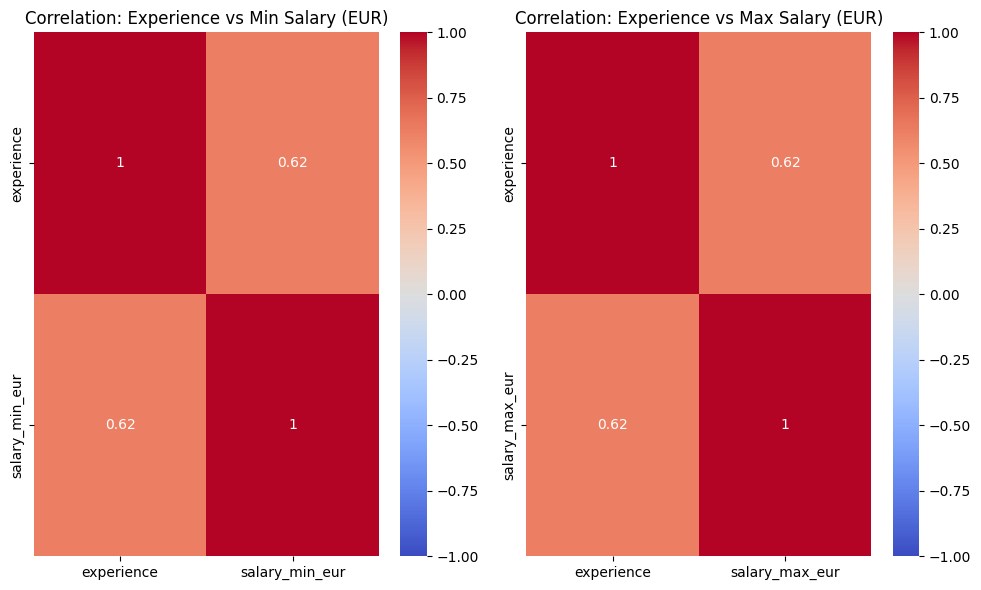

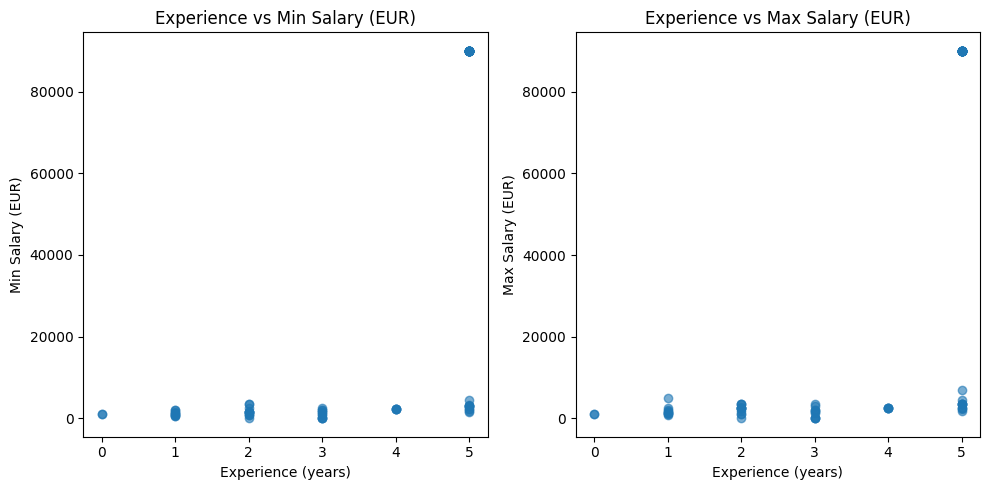

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter out rows where experience or salary (min or max) is missing
df_clean_corr = df.dropna(subset=['experience', 'salary_min_eur', 'salary_max_eur'])

# Compute correlation between experience and salaries
correlation_min = df_clean_corr[['experience', 'salary_min_eur']].corr()
correlation_max = df_clean_corr[['experience', 'salary_max_eur']].corr()

# Display correlation matrices
print("Correlation between Experience and Minimum Salary (EUR):")
print(correlation_min)
print("\nCorrelation between Experience and Maximum Salary (EUR):")
print(correlation_max)

# Plot heatmaps of the correlation matrices
plt.figure(figsize=(10, 6))

# Heatmap: Experience vs Min Salary
plt.subplot(1, 2, 1)
sns.heatmap(correlation_min, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation: Experience vs Min Salary (EUR)")

# Heatmap: Experience vs Max Salary
plt.subplot(1, 2, 2)
sns.heatmap(correlation_max, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation: Experience vs Max Salary (EUR)")

plt.tight_layout()
plt.show()

# Scatter plots for visual inspection
plt.figure(figsize=(10, 5))

# Scatter plot: Experience vs Min Salary
plt.subplot(1, 2, 1)
plt.scatter(df_clean_corr['experience'], df_clean_corr['salary_min_eur'], alpha=0.6)
plt.title("Experience vs Min Salary (EUR)")
plt.xlabel('Experience (years)')
plt.ylabel('Min Salary (EUR)')

# Scatter plot: Experience vs Max Salary
plt.subplot(1, 2, 2)
plt.scatter(df_clean_corr['experience'], df_clean_corr['salary_max_eur'], alpha=0.6)
plt.title("Experience vs Max Salary (EUR)")
plt.xlabel('Experience (years)')
plt.ylabel('Max Salary (EUR)')

plt.tight_layout()
plt.show()

## Salary and number of skills

Correlation Matrix (Average Salary vs Number of Skills):

                 salary_avg_eur  num_hard_skills  num_soft_skills
salary_avg_eur         1.000000         0.449368        -0.058226
num_hard_skills        0.449368         1.000000         0.515234
num_soft_skills       -0.058226         0.515234         1.000000


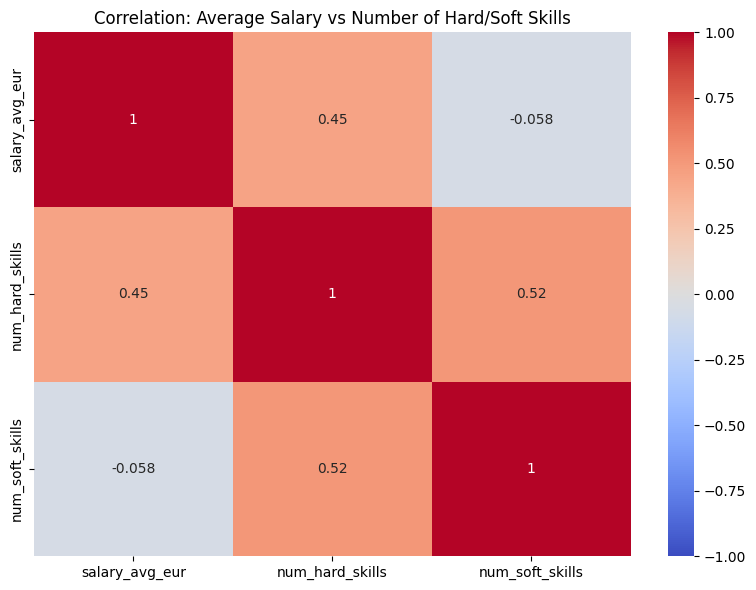

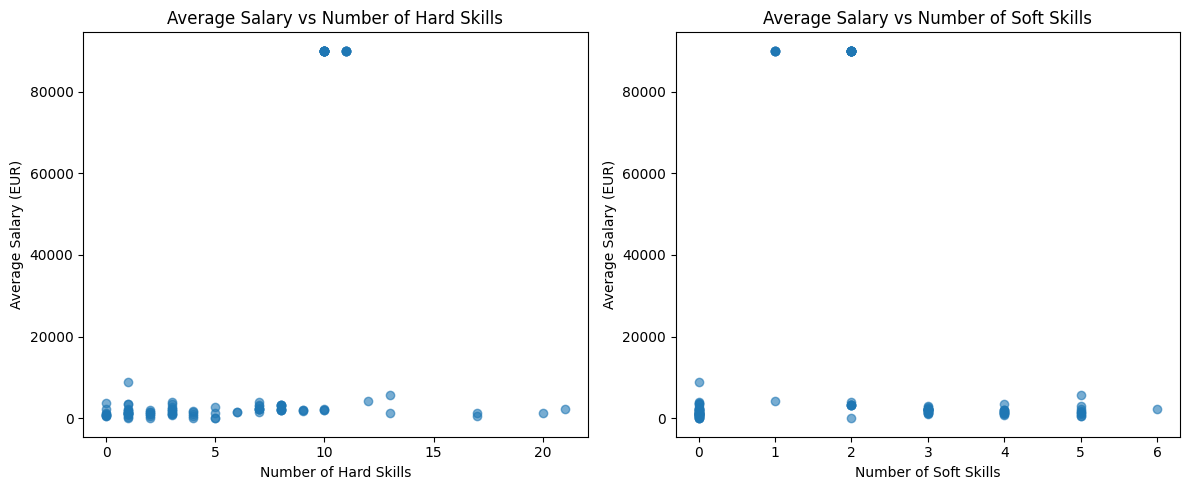

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `df` is already loaded and has `salary_min_eur` and `salary_max_eur` from your previous code

# 1. Calculate average salary (mean of min and max salaries)
df['salary_avg_eur'] = df[['salary_min_eur', 'salary_max_eur']].mean(axis=1)

# 2. Count the number of hard and soft skills
df['num_hard_skills'] = df['hard_skills'].apply(lambda x: len(x) if isinstance(x, list) else 0)
df['num_soft_skills'] = df['soft_skills'].apply(lambda x: len(x) if isinstance(x, list) else 0)

# 3. Filter out rows where salary_avg_eur is NaN
df_clean_skills = df.dropna(subset=['salary_avg_eur'])

# 4. Calculate correlations between average salary and number of skills
correlation_skills = df_clean_skills[['salary_avg_eur', 'num_hard_skills', 'num_soft_skills']].corr()

# Print the correlation matrix
print("Correlation Matrix (Average Salary vs Number of Skills):\n")
print(correlation_skills)

# 5. Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_skills, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation: Average Salary vs Number of Hard/Soft Skills')
plt.tight_layout()
plt.show()

# 6. Plot scatter plots for better visual understanding
plt.figure(figsize=(12, 5))

# Scatter plot for Average Salary vs Number of Hard Skills
plt.subplot(1, 2, 1)
plt.scatter(df_clean_skills['num_hard_skills'], df_clean_skills['salary_avg_eur'], alpha=0.6)
plt.title('Average Salary vs Number of Hard Skills')
plt.xlabel('Number of Hard Skills')
plt.ylabel('Average Salary (EUR)')

# Scatter plot for Average Salary vs Number of Soft Skills
plt.subplot(1, 2, 2)
plt.scatter(df_clean_skills['num_soft_skills'], df_clean_skills['salary_avg_eur'], alpha=0.6)
plt.title('Average Salary vs Number of Soft Skills')
plt.xlabel('Number of Soft Skills')
plt.ylabel('Average Salary (EUR)')

plt.tight_layout()
plt.show()


## Expected experience and number of skills

Correlation Matrix (Experience vs Number of Skills):

                 experience  num_hard_skills  num_soft_skills
experience         1.000000         0.147181         0.125719
num_hard_skills    0.147181         1.000000         0.309955
num_soft_skills    0.125719         0.309955         1.000000


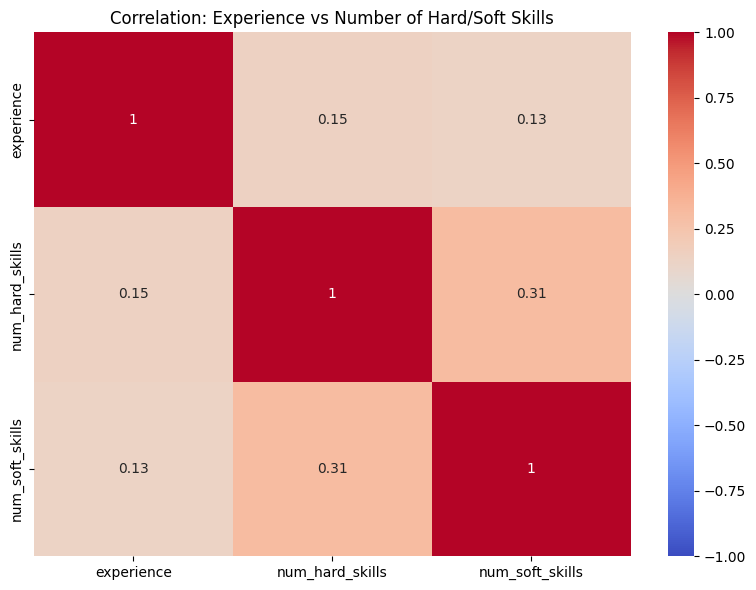

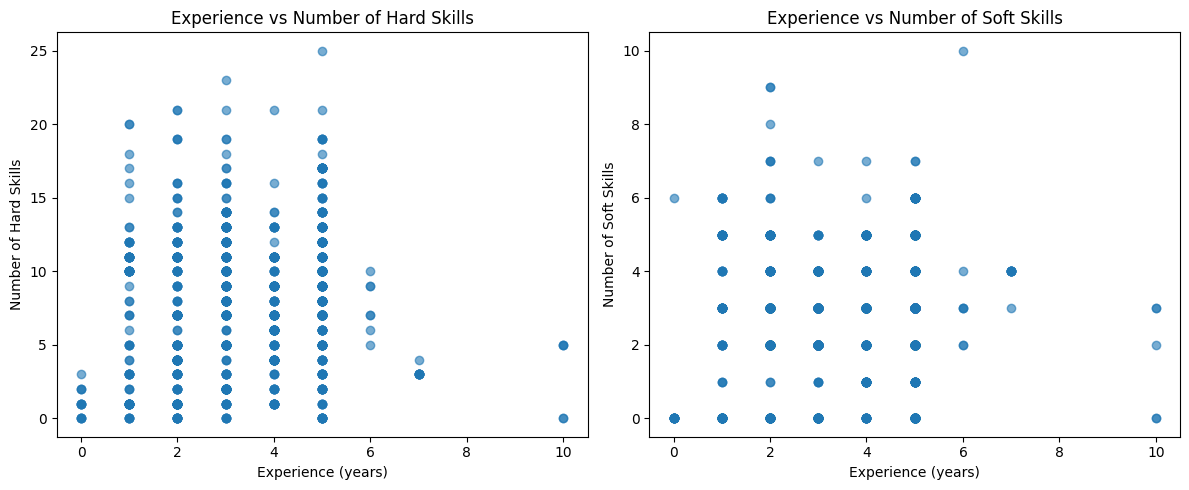

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `df` is already loaded

# Clean rows with NaN in 'experience', 'hard_skills', or 'soft_skills' and create a copy
df_clean_skills_exp = df.dropna(subset=['experience', 'hard_skills', 'soft_skills']).copy()

# Count the number of hard and soft skills
df_clean_skills_exp['num_hard_skills'] = df_clean_skills_exp['hard_skills'].apply(lambda x: len(x) if isinstance(x, list) else 0)
df_clean_skills_exp['num_soft_skills'] = df_clean_skills_exp['soft_skills'].apply(lambda x: len(x) if isinstance(x, list) else 0)

# Calculate correlations between experience and number of skills
correlation_exp_skills = df_clean_skills_exp[['experience', 'num_hard_skills', 'num_soft_skills']].corr()

# Print the correlation matrix
print("Correlation Matrix (Experience vs Number of Skills):\n")
print(correlation_exp_skills)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_exp_skills, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation: Experience vs Number of Hard/Soft Skills')
plt.tight_layout()
plt.show()

# Plot scatter plots for better visual understanding
plt.figure(figsize=(12, 5))

# Scatter plot for Experience vs Number of Hard Skills
plt.subplot(1, 2, 1)
plt.scatter(df_clean_skills_exp['experience'], df_clean_skills_exp['num_hard_skills'], alpha=0.6)
plt.title('Experience vs Number of Hard Skills')
plt.xlabel('Experience (years)')
plt.ylabel('Number of Hard Skills')

# Scatter plot for Experience vs Number of Soft Skills
plt.subplot(1, 2, 2)
plt.scatter(df_clean_skills_exp['experience'], df_clean_skills_exp['num_soft_skills'], alpha=0.6)
plt.title('Experience vs Number of Soft Skills')
plt.xlabel('Experience (years)')
plt.ylabel('Number of Soft Skills')

plt.tight_layout()
plt.show()


# Skill coocurences

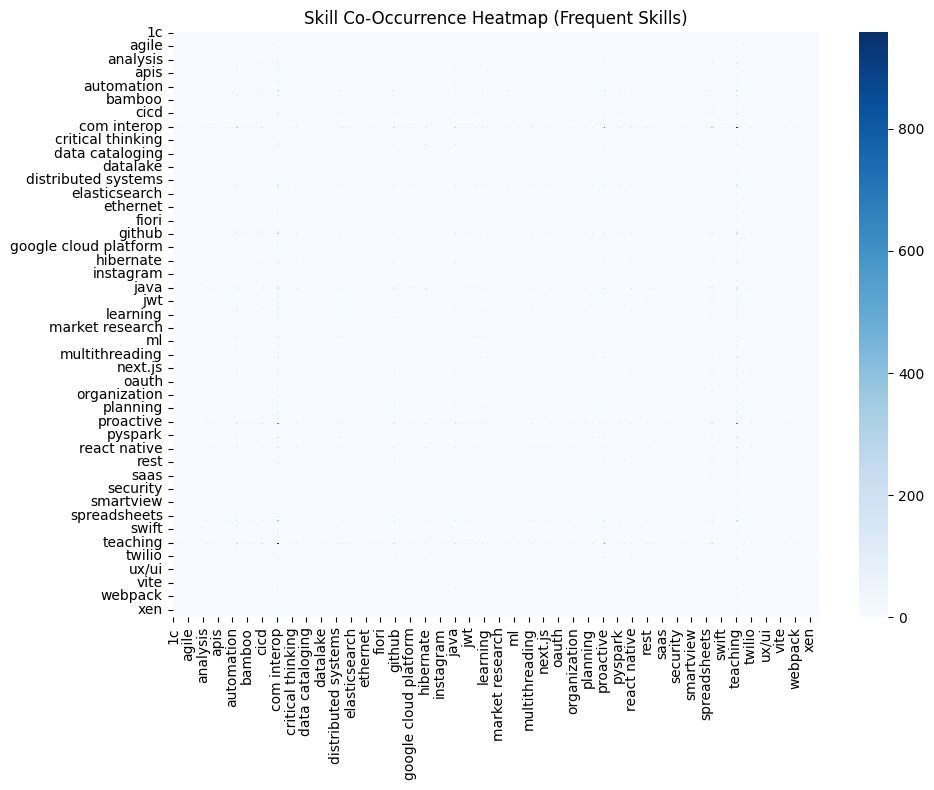

Top Skill Co-Occurrences:
communication & teamwork: 958 jobs
communication & problem solving: 652 jobs
problem solving & teamwork: 637 jobs
communication & sql: 378 jobs
aws & communication: 337 jobs
git & teamwork: 319 jobs
communication & git: 314 jobs
sql & teamwork: 302 jobs
git & problem solving: 289 jobs
communication & javascript: 277 jobs
problem solving & sql: 259 jobs
aws & teamwork: 254 jobs
communication & python: 244 jobs
communication & java: 235 jobs
javascript & teamwork: 234 jobs
docker & teamwork: 220 jobs
aws & problem solving: 218 jobs
communication & react: 212 jobs
python & teamwork: 209 jobs
cicd & communication: 208 jobs
cicd & teamwork: 206 jobs
communication & docker: 203 jobs
react & teamwork: 200 jobs
javascript & problem solving: 196 jobs
git & sql: 196 jobs
problem solving & python: 187 jobs
java & teamwork: 186 jobs
javascript & react: 181 jobs
cicd & problem solving: 178 jobs
html & javascript: 172 jobs
postgresql & teamwork: 169 jobs
azure & communicati

In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations

# Assuming df is already loaded
# Flatten all skills (hard + soft) into a single list per job
df['all_skills'] = df['hard_skills'] + df['soft_skills']

# Step 1: Collect unique skills incrementally and count frequencies
skill_counts = {}
for skills in df['all_skills']:
    for skill in skills:
        skill_counts[skill] = skill_counts.get(skill, 0) + 1

# Step 2: Filter skills appearing in at least 3 jobs
min_appearances = 3
frequent_skills = [skill for skill, count in skill_counts.items() if count >= min_appearances]
frequent_skills.sort()  # Sort for consistent ordering
skill_to_idx = {skill: idx for idx, skill in enumerate(frequent_skills)}

# Step 3: Create co-occurrence matrix using numpy
n_skills = len(frequent_skills)
co_occurrence_np = np.zeros((n_skills, n_skills), dtype=int)
for skills in df['all_skills']:
    # Only consider frequent skills
    job_skills = [skill for skill in skills if skill in skill_to_idx]
    skill_indices = [skill_to_idx[skill] for skill in job_skills]
    for i, j in combinations(skill_indices, 2):
        co_occurrence_np[i, j] += 1
        co_occurrence_np[j, i] += 1

# Convert to DataFrame for plotting
co_occurrence = pd.DataFrame(co_occurrence_np, index=frequent_skills, columns=frequent_skills)

# Step 4: Visualize as a heatmap
plt.figure(figsize=(10, 8))
annot = len(frequent_skills) <= 15
sns.heatmap(co_occurrence, cmap='Blues', annot=annot, fmt='d')
plt.title('Skill Co-Occurrence Heatmap (Frequent Skills)')
plt.tight_layout()
plt.show()

# Step 5: Alternative visualization - Bar chart of top co-occurrences
co_occurrence_stack = co_occurrence.where(np.triu(np.ones(co_occurrence.shape), k=1).astype(bool)).stack()
top_co_occurrences = co_occurrence_stack[co_occurrence_stack > 0].sort_values(ascending=False).head(50)

# Print top co-occurrences
print("Top Skill Co-Occurrences:")
for (skill1, skill2), count in top_co_occurrences.items():
    print(f"{skill1} & {skill2}: {int(count)} jobs")